<a href="https://colab.research.google.com/github/ipeirotis/dealing_with_data/blob/master/03-Pandas/A-Introduction_to_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Pandas

## Setup and preliminaries

We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [1]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [3]:
# Make the graphs a bit bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

## Analyzing Data in CSV Files

We will use a dataset with [restaurant inspection results in NYC](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j).

We fetch it by executing the following command:

In [4]:
# Fetches the most recent dataset
!curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o restaurant.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  152M    0  152M    0     0  6009k      0 --:--:--  0:00:25 --:--:-- 7002k


We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [5]:
import pandas as pd
restaurants = pd.read_csv("restaurant.csv", 
                          encoding='utf_8', 
                          dtype = 'unicode',
                          parse_dates = True,
                          infer_datetime_format = True,
                          low_memory=False)

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [6]:
restaurants.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50002767,THE SKYLARK,Manhattan,530,FASHION AVENUE,10018,2122574577,American,02/15/2017,D,10B,Plumbing not properly installed or maintained;...,G,12,A,02/15/2017,05/21/2021,Cycle Inspection / Initial Inspection,40.753843959794,-73.988551029682,105,03,011300,1014485,1007880049,MN17
1,50071004,SPOONS,Brooklyn,5001,13TH AVE,11219,7186335555,Jewish/Kosher,02/25/2019,F,10B,Plumbing not properly installed or maintained;...,G,19,B,02/25/2019,05/21/2021,Cycle Inspection / Re-inspection,40.634369857963,-73.992779791426,312,44,023600,3138066,3056490010,BK88
2,50071004,SPOONS,Brooklyn,5001,13TH AVE,11219,7186335555,Jewish/Kosher,02/25/2019,F,10B,Plumbing not properly installed or maintained;...,G,19,B,02/25/2019,05/21/2021,Cycle Inspection / Re-inspection,40.634369857963,-73.992779791426,312,44,023600,3138066,3056490010,BK88
3,50005269,NO. 1 CHINESE RESTAURANT,Brooklyn,661,NOSTRAND AVENUE,11216,7186048300,Chinese,04/10/2018,D,04M,Live roaches present in facility's food and/or...,C,11,A,04/10/2018,05/21/2021,Cycle Inspection / Initial Inspection,40.674627856562,-73.950040775304,308,36,031701,3030990,3012270001,BK61
4,41566403,AGORA TAVERNA,Queens,7009,AUSTIN STREET,11375,7187937300,Greek,12/04/2019,D,10F,Non-food contact surface improperly constructe...,G,12,A,12/04/2019,05/21/2021,Cycle Inspection / Re-inspection,40.720821230918,-73.846587155131,406,29,071100,4077481,4032380033,QN17


The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

## Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [7]:
restaurants.describe()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
count,419605,418639,419605,418713,419510,412714,419567,415265,419605,415265,409904,412702,412703,399831,214575,212118,419605,415265,419076,419076,411589,411589,411589,409650,418385,411589
unique,29814,23098,6,8002,2424,228,27399,84,1448,13,105,105,5,136,7,1302,1,31,23572,23572,69,51,1190,20410,20066,193
top,50035784,DUNKIN,Manhattan,1,BROADWAY,10003,7185958100,American,01/01/1900,D,10F,Non-food contact surface improperly constructe...,C,12,A,06/05/2019,05/21/2021,Cycle Inspection / Initial Inspection,0,0,105,03,006500,4000000,1,MN17
freq,104,4828,164396,2406,15187,10593,297,80454,4340,163523,73168,73304,219100,43312,171379,524,419605,244462,6796,6796,33994,36510,3459,1842,4029,25059


We can also check the data types for each column

In [8]:
restaurants.dtypes

CAMIS                    object
DBA                      object
BORO                     object
BUILDING                 object
STREET                   object
ZIPCODE                  object
PHONE                    object
CUISINE DESCRIPTION      object
INSPECTION DATE          object
ACTION                   object
VIOLATION CODE           object
VIOLATION DESCRIPTION    object
CRITICAL FLAG            object
SCORE                    object
GRADE                    object
GRADE DATE               object
RECORD DATE              object
INSPECTION TYPE          object
Latitude                 object
Longitude                object
Community Board          object
Council District         object
Census Tract             object
BIN                      object
BBL                      object
NTA                      object
dtype: object

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions. We examine how to convert data types below.

### Descriptive Statistics for Numeric Variables


#### Converting Data Types to Numeric

The `object` type is a string. When we want to convert an object to numeric, we can use the `pd.to_numeric` function, as shown below:

In [9]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

CAMIS                     object
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                   object
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                  object
Longitude                 object
Community Board           object
Council District          object
Census Tract              object
BIN                       object
BBL                       object
NTA                       object
dtype: object

#### Basic descriptive statistics for numeric variables

And now that SCORE is a numeric variable, we can get more detailed descriptive statistics for the variable using the `.describe()` command:

In [10]:
restaurants.SCORE.describe()

count    399831.000000
mean         19.843912
std          14.701111
min          -1.000000
25%          11.000000
50%          14.000000
75%          25.000000
max         164.000000
Name: SCORE, dtype: float64

And now that SCORE is a numeric variable, we can examine its distribution by using the `hist` command of Pandas, which creates a histogram. (The histogram is lso available as `plot.hist`, or `plot(kind='hist'))`.)

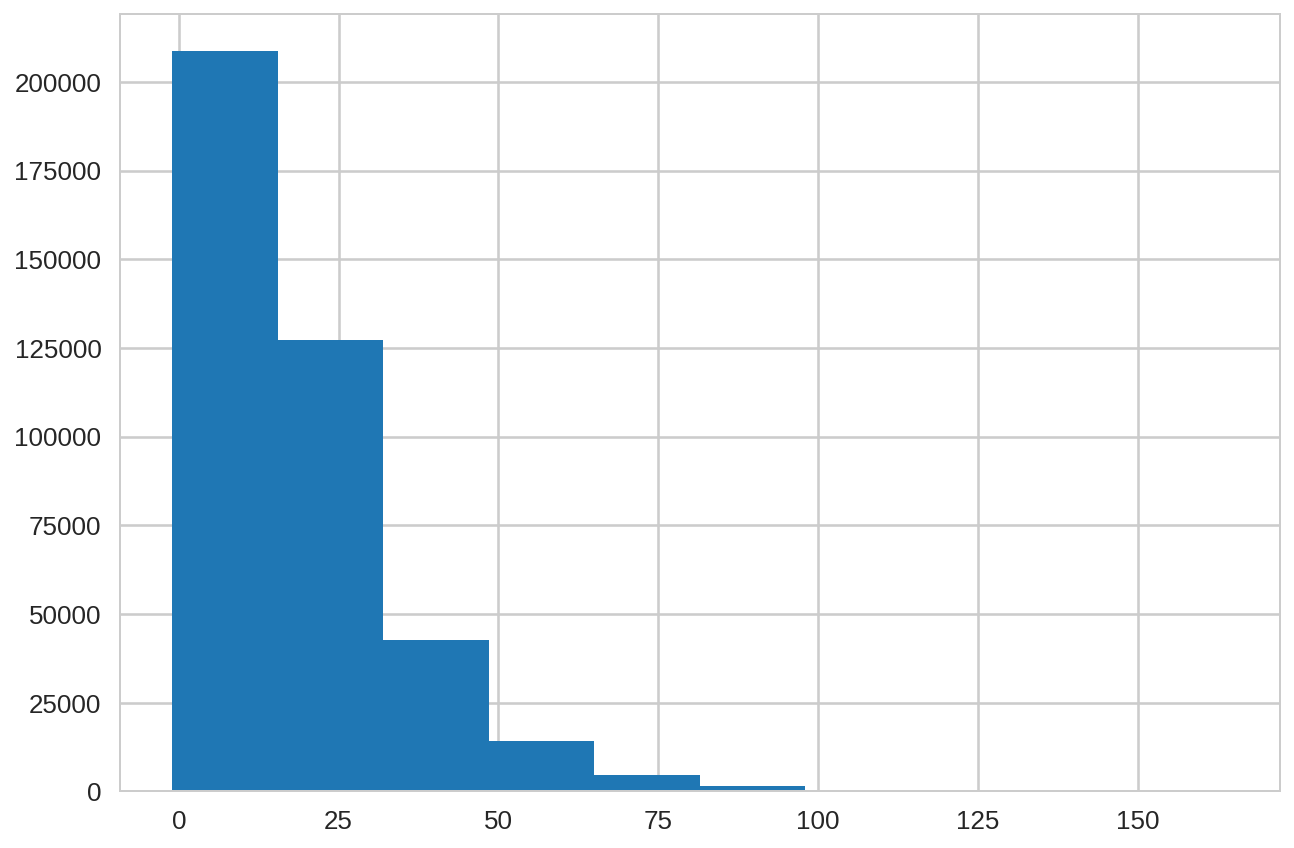

In [11]:
restaurants["SCORE"].hist()

By default, the histogram has ~10 bars in out plot. We can change the resolution of the histogram using the `bins` variable. Larger number of `bins` allow for higher resolution, but if we increase the number too much, many bins end up having very few, or no data points. For example, experiment with changing the balue of bins below, and change the value from 50 to something bigger.

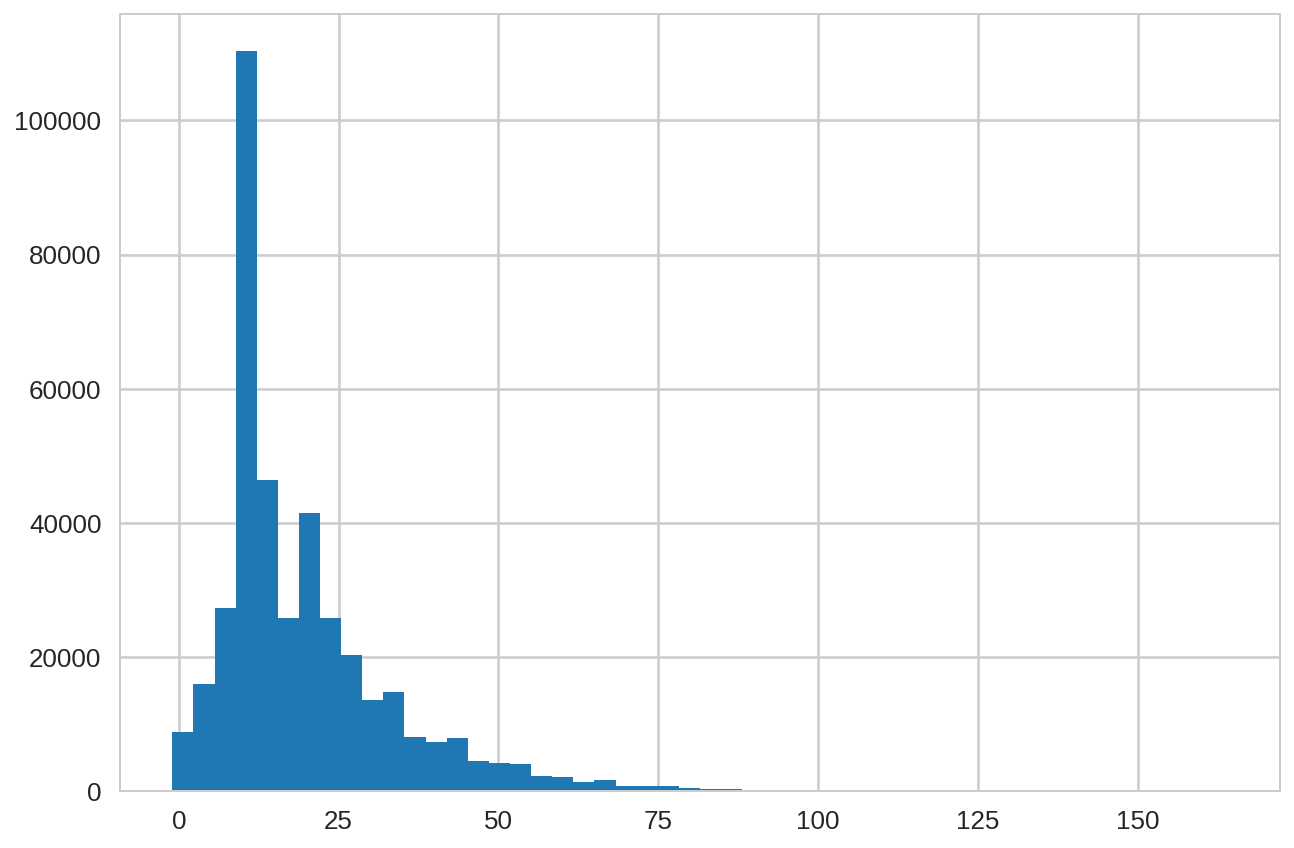

In [12]:
restaurants["SCORE"].hist(bins=50)

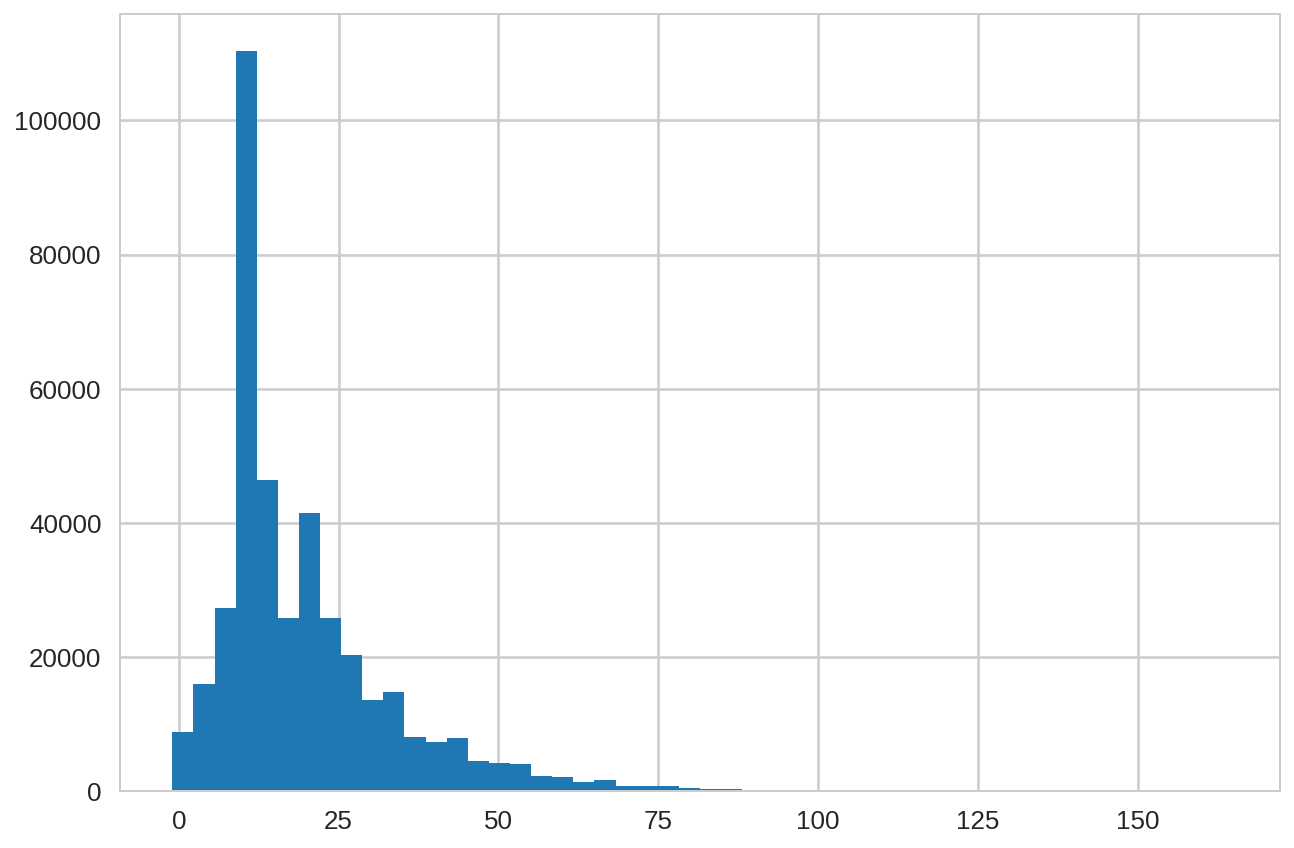

In [13]:
# For column names without a space, we can also access directly the column as follows:
restaurants.SCORE.hist(bins=50)

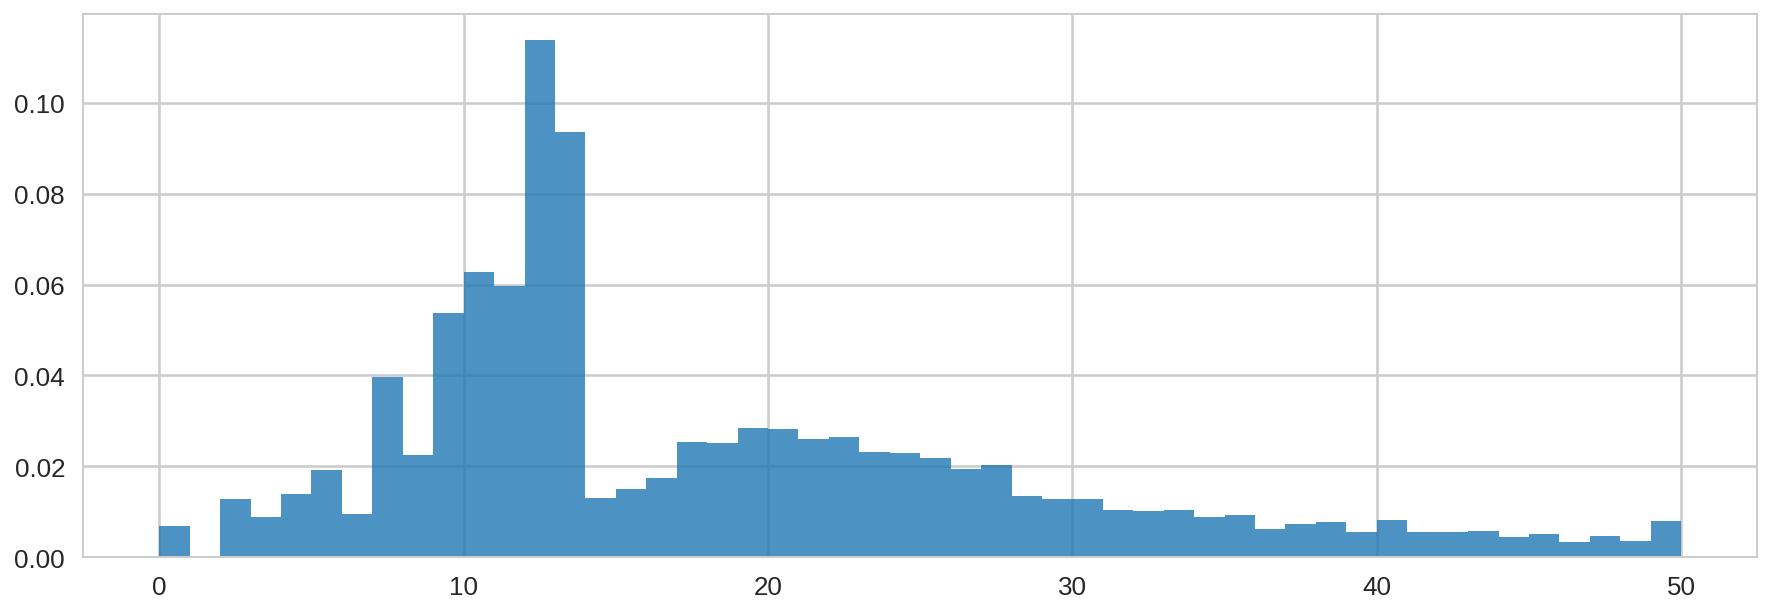

In [14]:
# A quick exposure to various options of the "hist" command 
restaurants.SCORE.hist(bins=50, # use 50 bars
                          range=(0,50), # x-axis from 0 to 50
                          density=True,  # show normalized count (density=True), or raw counts (density= False)
                          figsize=(15,5), # controls the size of the plot
                          alpha = 0.8 # make the plot 20% transparent
                         )

#### Kernel Density Estimation (KDE)

An alternative to histograms is to use the **kernel density**, which estimates a continuous function, instead of the bucketized counts, which tends to be discontunuous and bumpy. We can access this usind the `.plot(kind='kde')` command:

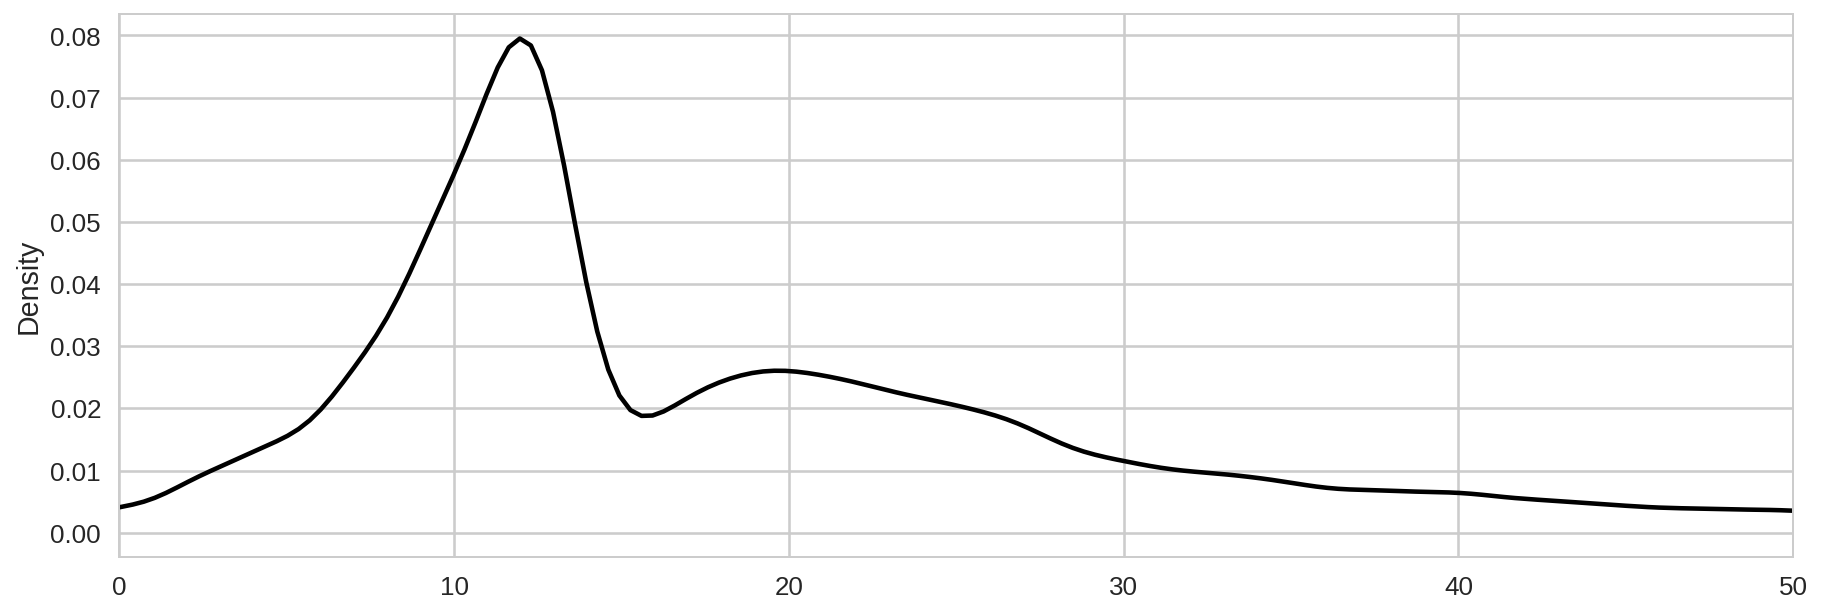

In [15]:
# This plots the density of a numeric attribute
# kde = kernel density estimation
restaurants.SCORE.plot(
    kind='kde', 
    color='Black', 
    xlim=(0,50), 
    figsize=(15,5)
)

#### Extra: Combining plots

Just as a quick note, we can actually easily combine plots in Pandas, by saving a plot in a variable, and then passing the parameter `ax = ....` in the new figure that we are creating. That `ax` parameter indicates that we want to plot the new chart on top of the plot specified in the `ax` parameter.

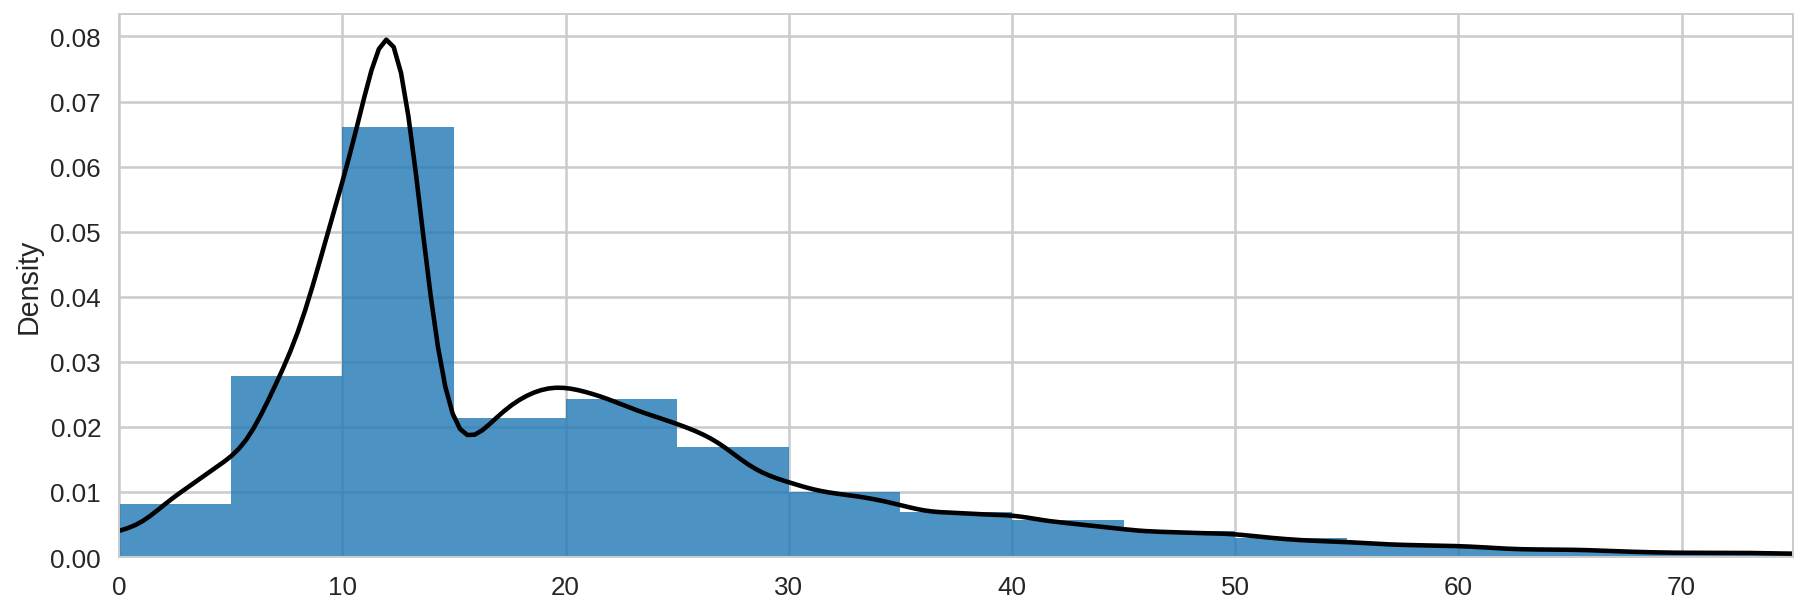

In [16]:
# We save the plot in the variable "histogram_figure"
histogram_figure = restaurants.SCORE.hist(bins=15, # use 50 bars
                          range=(0,75), # x-axis from 0 to 50
                          density=True,  # show normalized count (density=True), or raw counts (density= False)
                          figsize=(15,5), # controls the size of the plot
                          alpha = 0.8 # make the plot 20% transparent
                         )

# To combine the plots, we pass the ax = histogram_figure parameter
restaurants.SCORE.plot(
    kind='kde', 
    color='Black', 
    xlim=(0,75), 
    figsize=(15,5),
    ax = histogram_figure
)

### Descriptive Statistics for Dates



####  Converting Dates

Now let's convert the dates columns into the appropriate data types. Let's take a look at a few dates.

In [17]:
restaurants["GRADE DATE"].head(10)

0    02/15/2017
1    02/25/2019
2    02/25/2019
3    04/10/2018
4    12/04/2019
5           NaN
6           NaN
7           NaN
8    10/27/2016
9           NaN
Name: GRADE DATE, dtype: object

For that, we need to understand first how to [parse dates using the Python conventions](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

The relevant entries from the table are:
* `%m` Month as a zero-padded decimal number.
* `%d` 	Day of the month as a zero-padded decimal number.
* `%Y` Year with century as a decimal number.

Now, we can specify how to parse these dates. (In principle, we can let Pandas do this automatically, but it is _much_ faster if we specify it ourselves. It is also much less error-prone.)

In [18]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [19]:
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                         object
Longitude                        object
Community Board                  object
Council District                 object
Census Tract                     object
BIN                              object
BBL                              object


In [20]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning an

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,419605,212118,419605
unique,1448,1302,1
top,1900-01-01 00:00:00,2019-06-05 00:00:00,2021-05-21 00:00:00
freq,4340,524,419605
first,1900-01-01 00:00:00,2011-05-27 00:00:00,2021-05-21 00:00:00
last,2021-05-14 00:00:00,2020-12-31 00:00:00,2021-05-21 00:00:00


#### Exercise

* Plot a histogram for `INSPECTION DATE`, `GRADE DATE`, `RECORD DATE`. What do you see?
* Try modifying the `bins` parameter. What are the results?
* The `range=(start, finish)` command is often useful, when we want to focus on a particular part of the dataset. Try using that for  `INSPECTION DATE` to limit the dates to be between 1/1/2016 and 04/30/2020.

In [21]:
# your code here

#### Solution

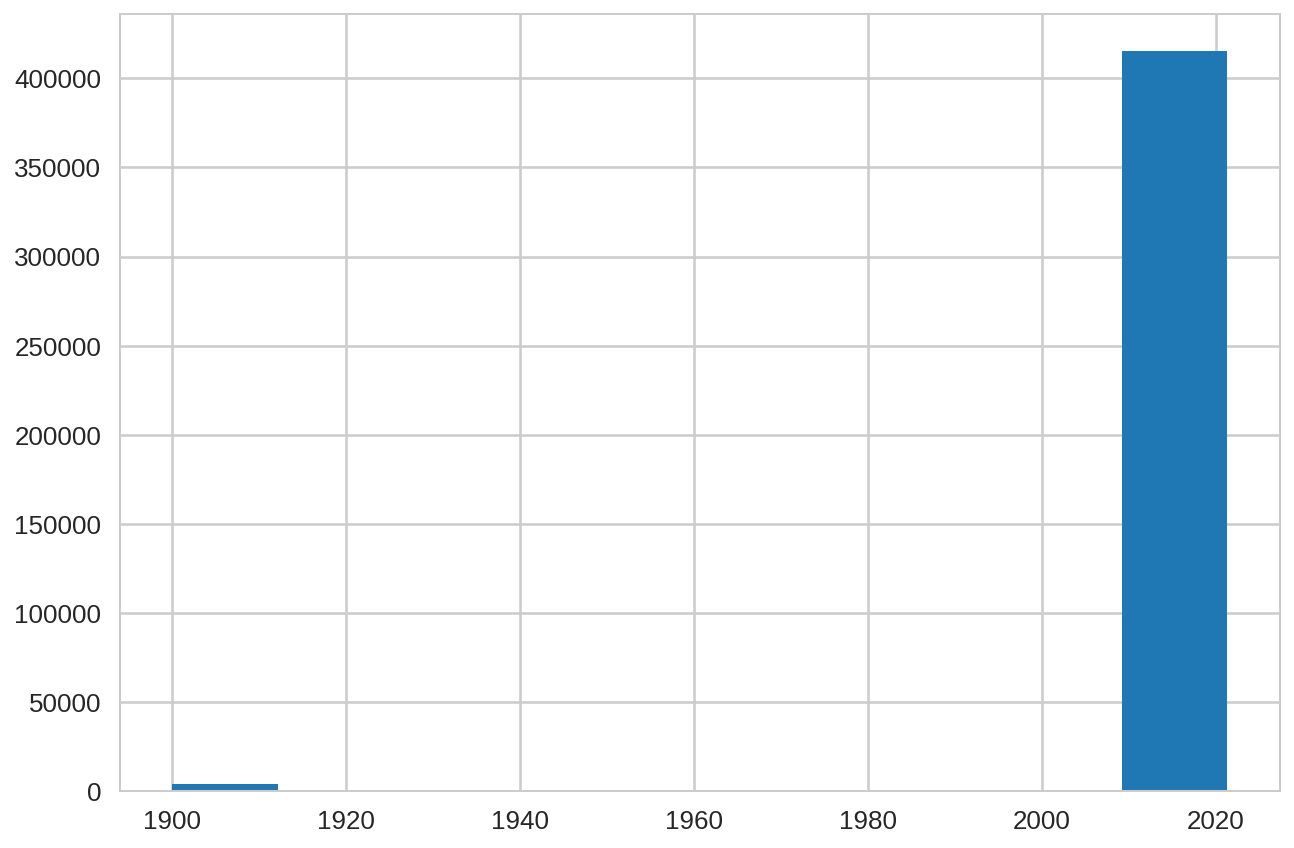

In [22]:
# Not very appealing
restaurants['INSPECTION DATE'].hist()

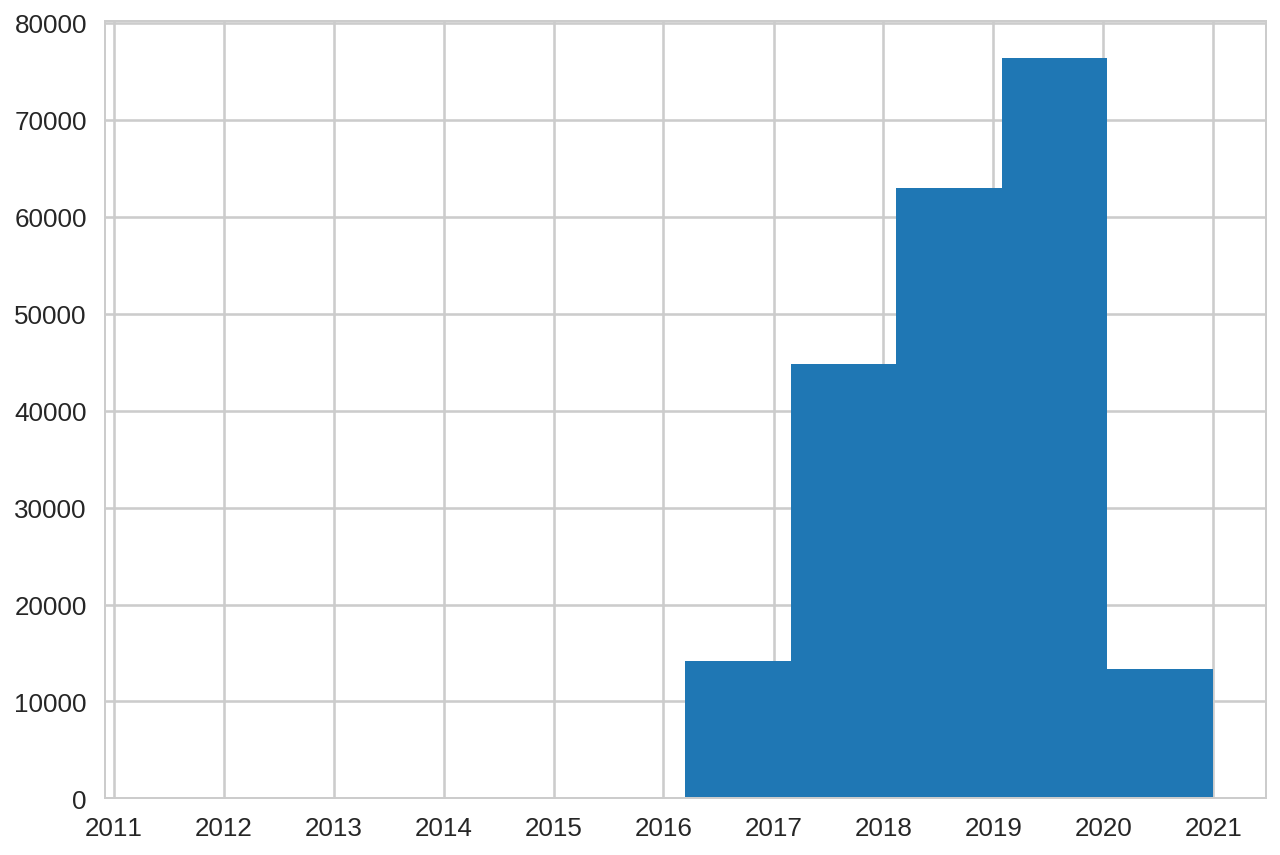

In [23]:
restaurants['GRADE DATE'].hist()

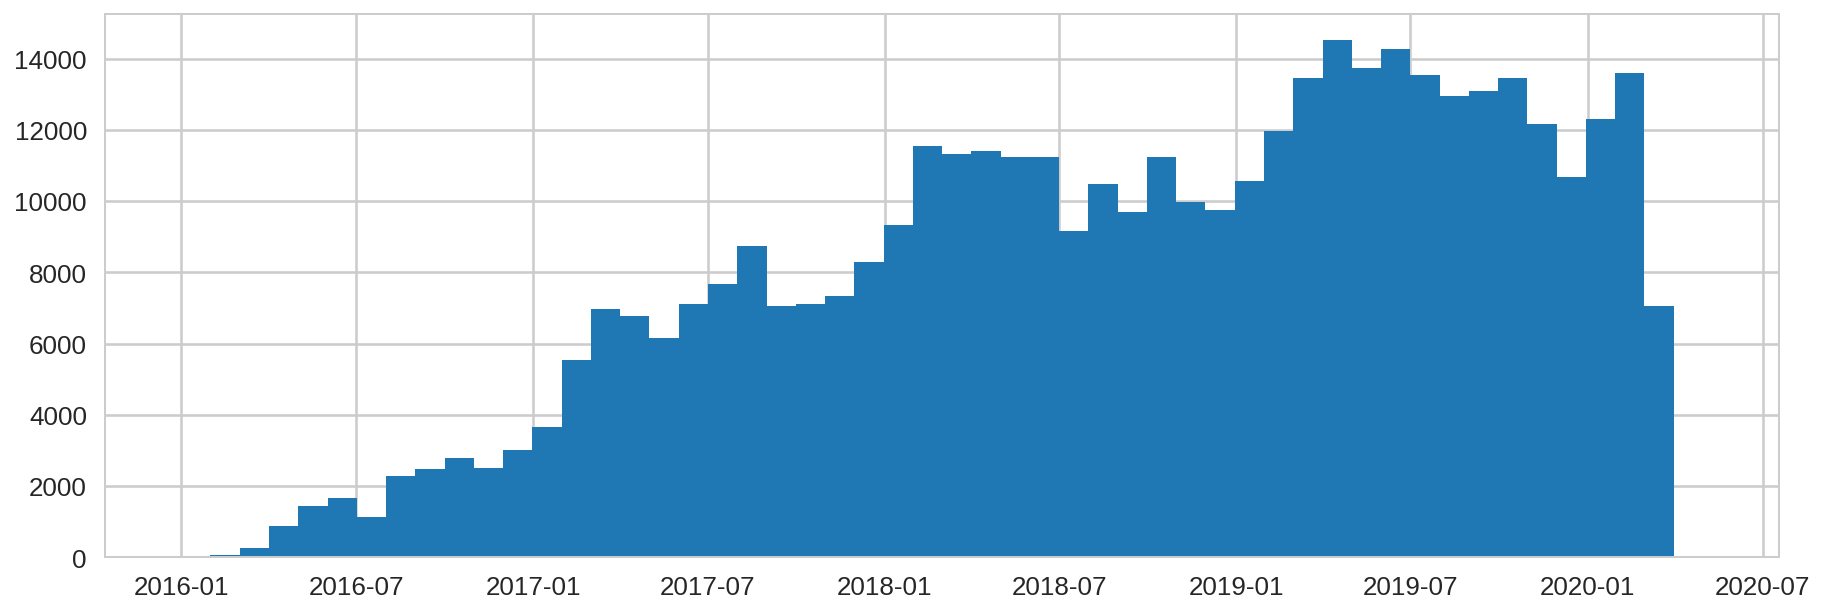

In [24]:
x_start = pd.to_datetime('2016-01-01')
x_end = pd.to_datetime('2020-04-30')
bins =  (x_end - x_start) / np.timedelta64(1, 'M') # one bin per month

restaurants['INSPECTION DATE'].hist(
    range = (x_start,x_end), # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins = round(bins), # number of months in the range -- computed manually
    figsize = (15,5) # resize 15-width, 5-height
)

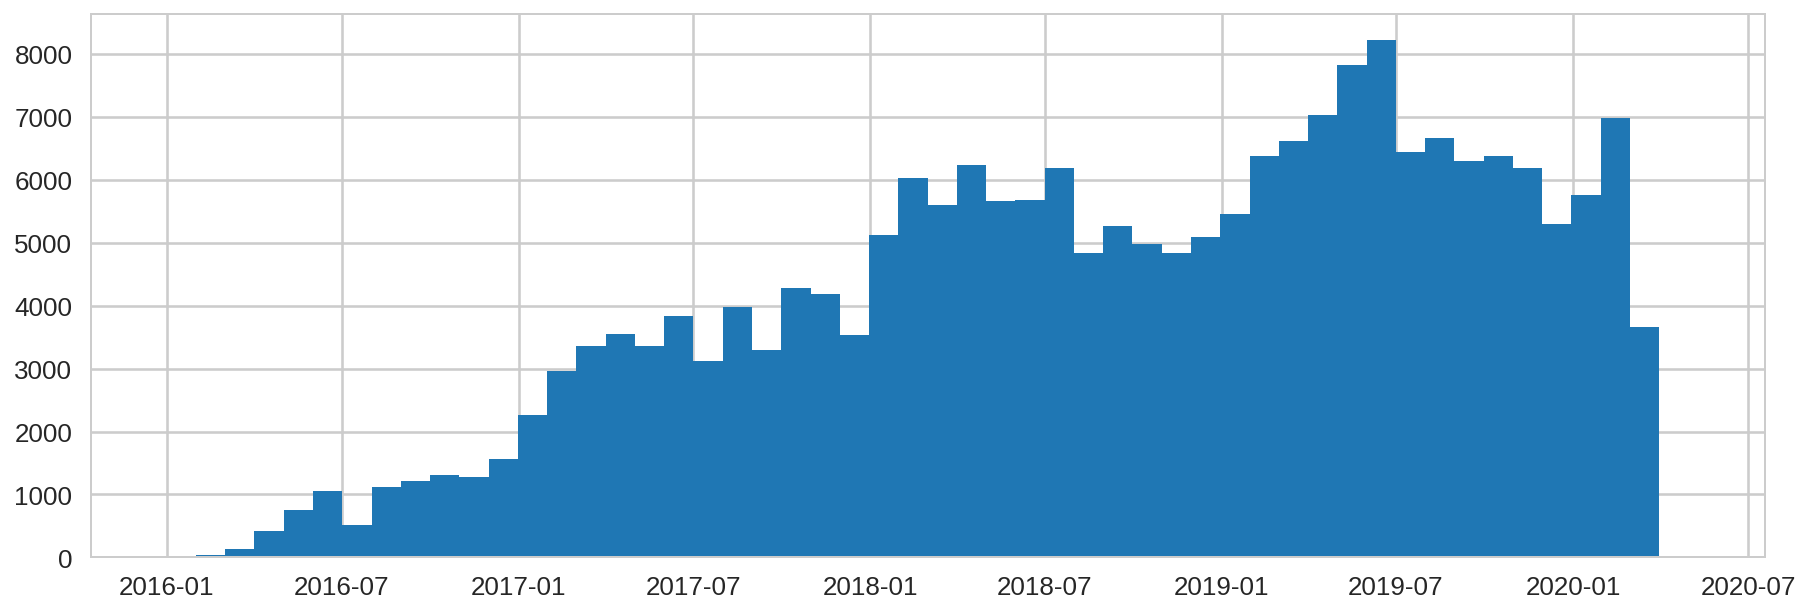

In [25]:
restaurants['GRADE DATE'].hist(
    range = (x_start,x_end), # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins = round(bins), # number of months in the range -- computed manually
    figsize = (15,5) # resize 15-width, 5-height
)

### Descriptive Statistics for Categorical Variables

This is less important, but sometimes we want to specify variables to be "Categorical". This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).

In [26]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                         object
Longitude                        object
Community Board                  object
Council District                 object
Census Tract                     object
BIN                              object
BBL                              object


#### Analyzing the content of categorical/string columns

We can also get quick statistics about the common values that appear in each column:

In [27]:
restaurants["DBA"].value_counts()

DUNKIN                       4828
SUBWAY                       3134
STARBUCKS                    2421
MCDONALD'S                   2312
KENNEDY FRIED CHICKEN        1415
                             ... 
SWEETORIES                      1
HOUSE PARTY CAFE & LOUNGE       1
CONNIE'S PIZZERIA               1
TILLAGE RESTAURANT              1
CITY ISLAND JUICE BAR           1
Name: DBA, Length: 23098, dtype: int64

In [28]:
restaurants["CUISINE DESCRIPTION"].value_counts()

American             80454
Chinese              43822
Pizza                26535
Coffee/Tea           20926
Latin American       18422
                     ...  
Fruits/Vegetables       37
Chilean                 32
New American            22
Basque                  10
Lebanese                 1
Name: CUISINE DESCRIPTION, Length: 84, dtype: int64

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

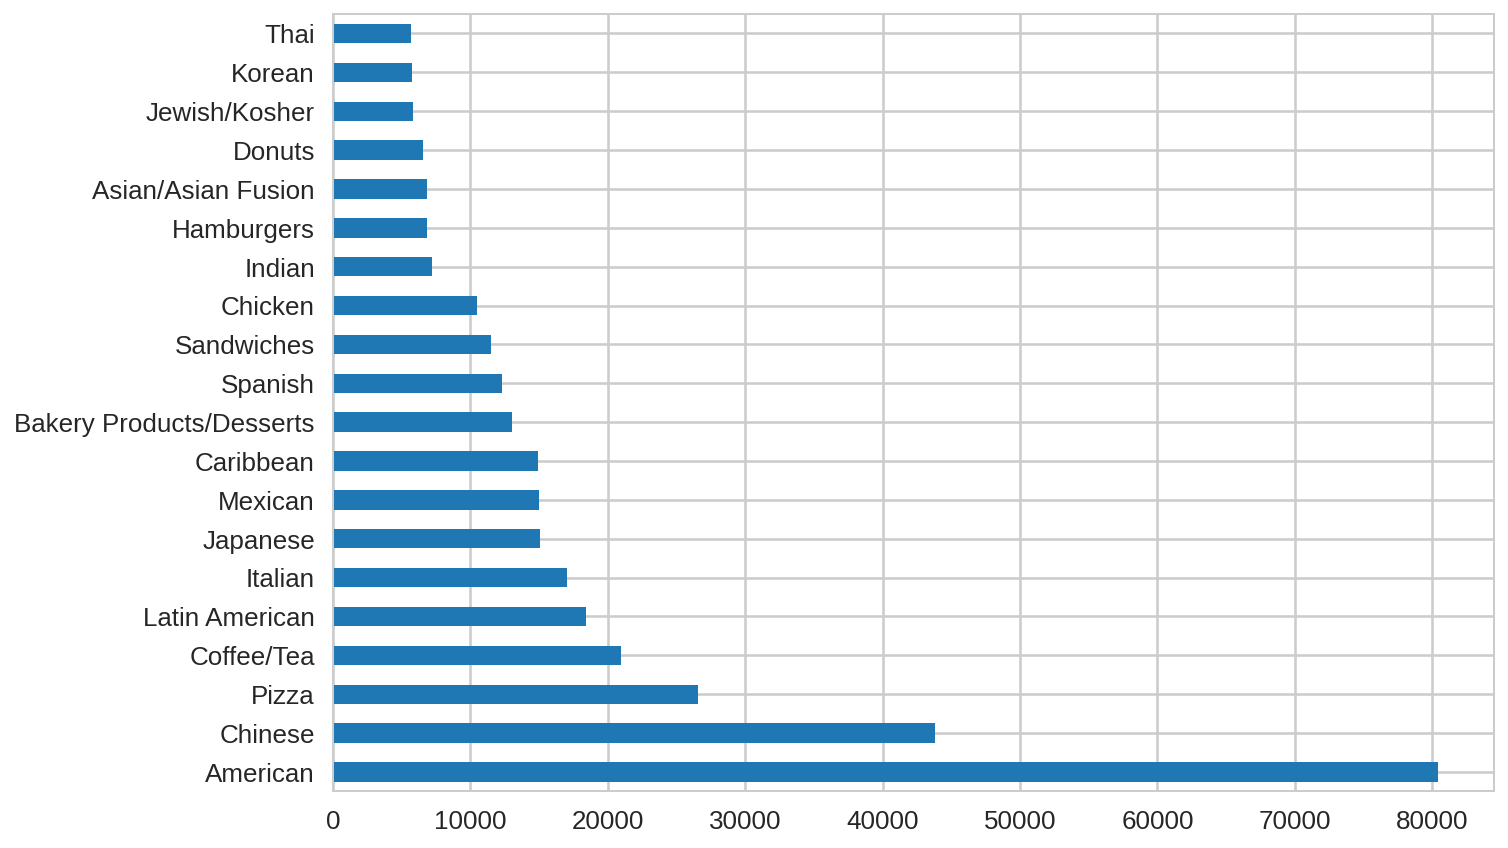

In [29]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:20].plot(kind='barh')

In [30]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular

American             80454
Chinese              43822
Pizza                26535
Coffee/Tea           20926
Latin American       18422
                     ...  
Fruits/Vegetables       37
Chilean                 32
New American            22
Basque                  10
Lebanese                 1
Name: CUISINE DESCRIPTION, Length: 84, dtype: int64

Hm, that does not look nice. Let's shorten the name of the cuisine for the _"Latin (Cuban, Dominican, Puerto Rican, South & Central American)"_ and replace it with _"Latin American"_. We will use the `replace` command in Pandas:

In [31]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
    value = 'Latin American',
    inplace=True
)

In [32]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='CafÃ©/Coffee/Tea',
    value = 'Cafe/Coffee/Tea',
    inplace=True
)


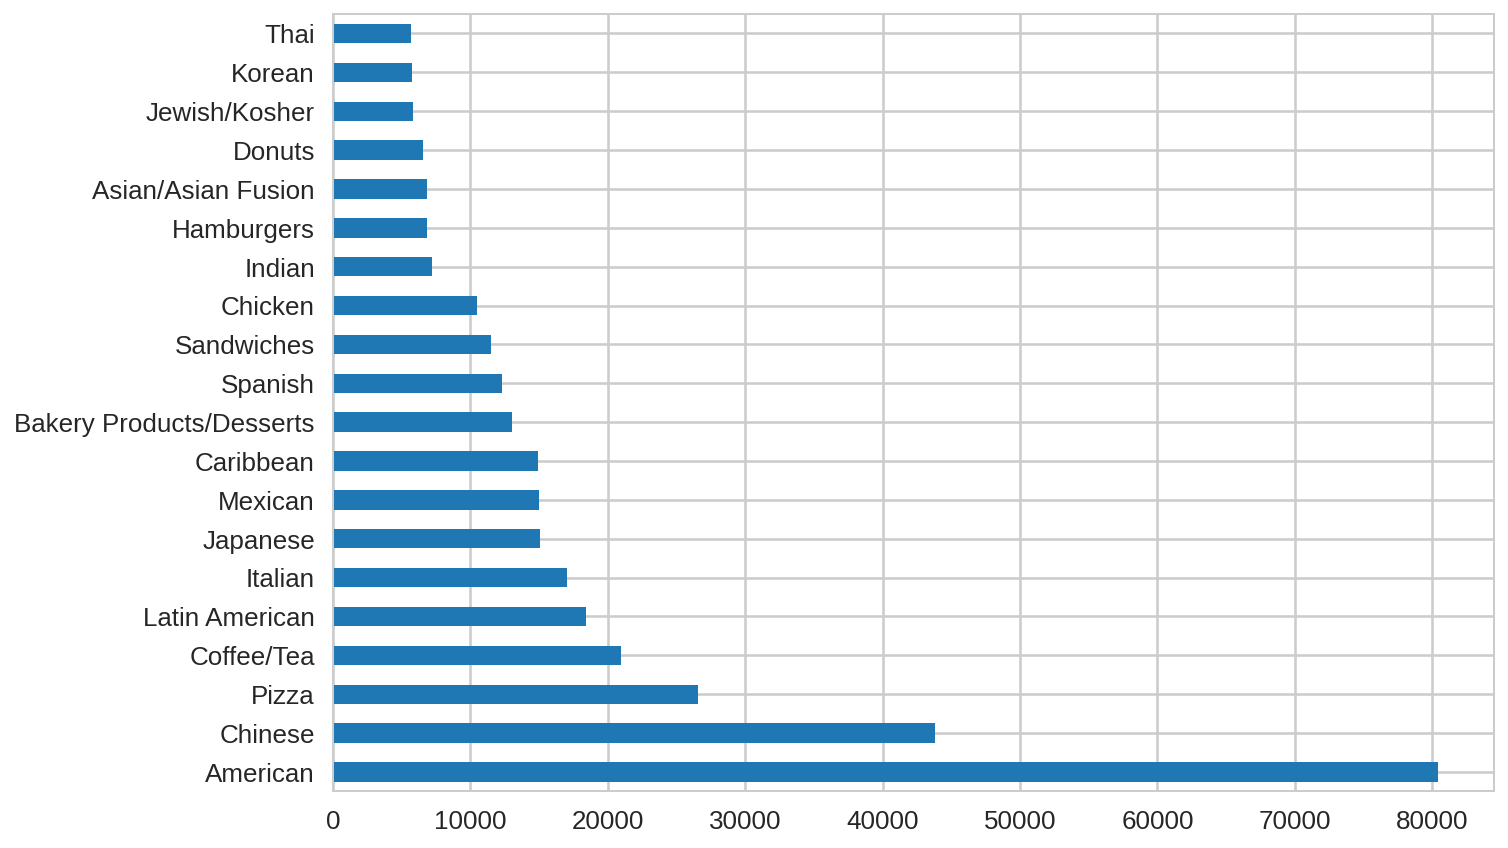

In [33]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:20].plot(kind='barh')

In [34]:
restaurants["VIOLATION CODE"].head(5)

0    10B
1    10B
2    10B
3    04M
4    10F
Name: VIOLATION CODE, dtype: category
Categories (105, object): ['02A', '02B', '02C', '02D', ..., '22E', '22F', '22G', '99B']

In [35]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

10F    73168
08A    43348
04L    29229
06D    26754
06C    26463
10B    25105
02G    24169
04N    20575
02B    19968
04M     8674
Name: VIOLATION CODE, dtype: int64

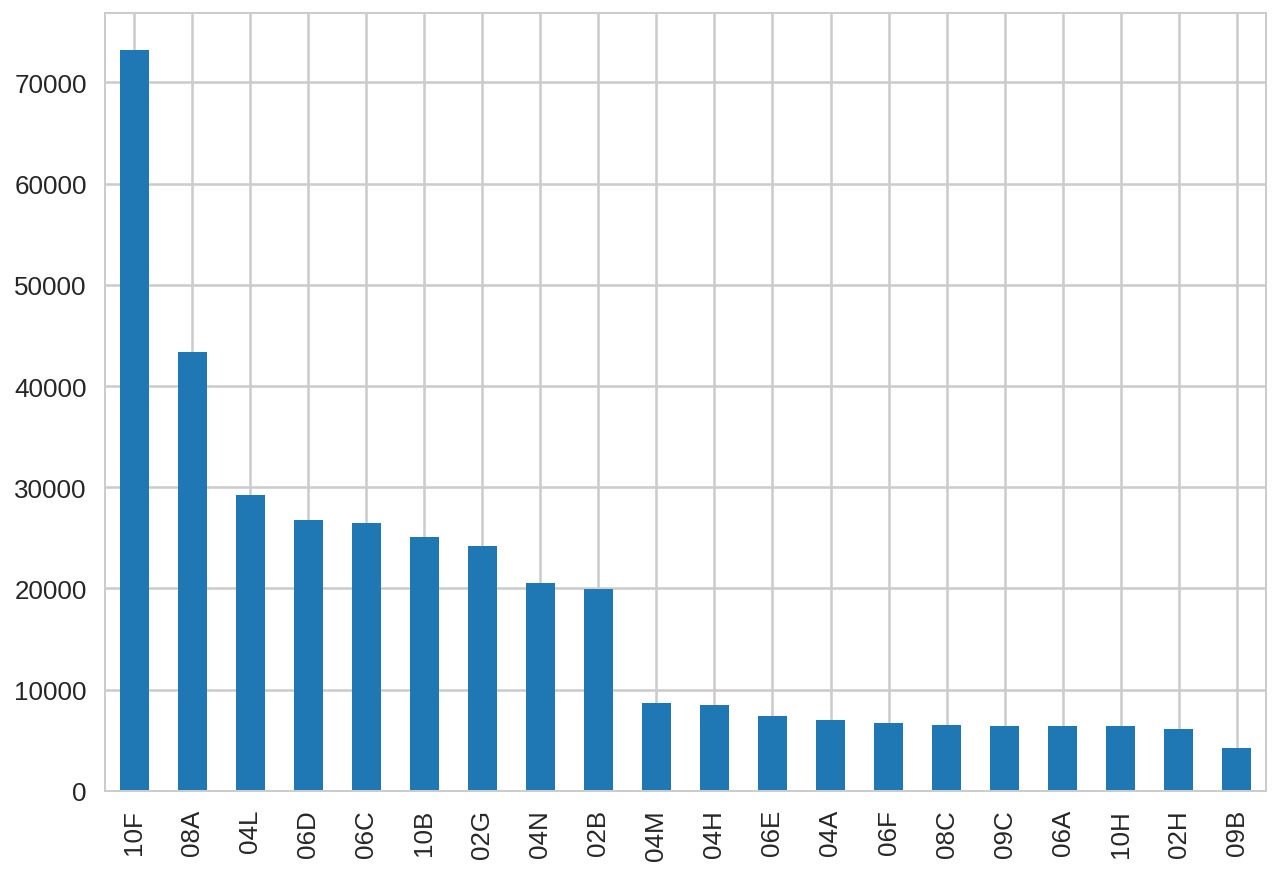

In [36]:
violation_counts[0:20].plot(kind='bar')

#### Exercise

* Create a plot showing the number of inspections that happen across **boroughs**. Use the `BORO` column and the `value_counts()` function.

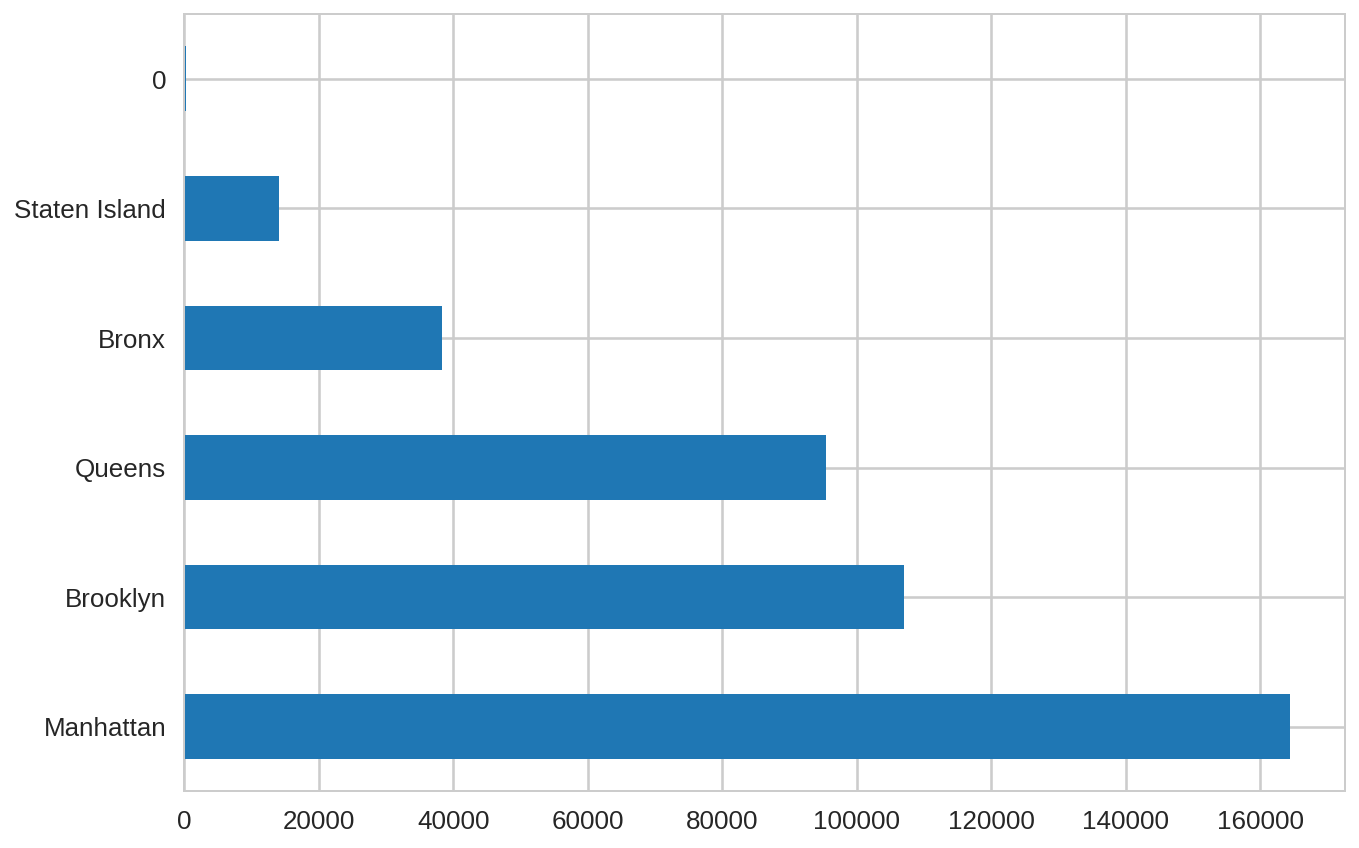

In [37]:
# your code here
restaurants["BORO"].value_counts().plot(kind='barh')

#### Solution 

In [38]:
restaurants['BORO'].value_counts()

Manhattan        164396
Brooklyn         107082
Queens            95454
Bronx             38384
Staten Island     14099
0                   190
Name: BORO, dtype: int64

In [39]:
# Same as above; works only for attribute names without spaces
restaurants.BORO.value_counts()

Manhattan        164396
Brooklyn         107082
Queens            95454
Bronx             38384
Staten Island     14099
0                   190
Name: BORO, dtype: int64

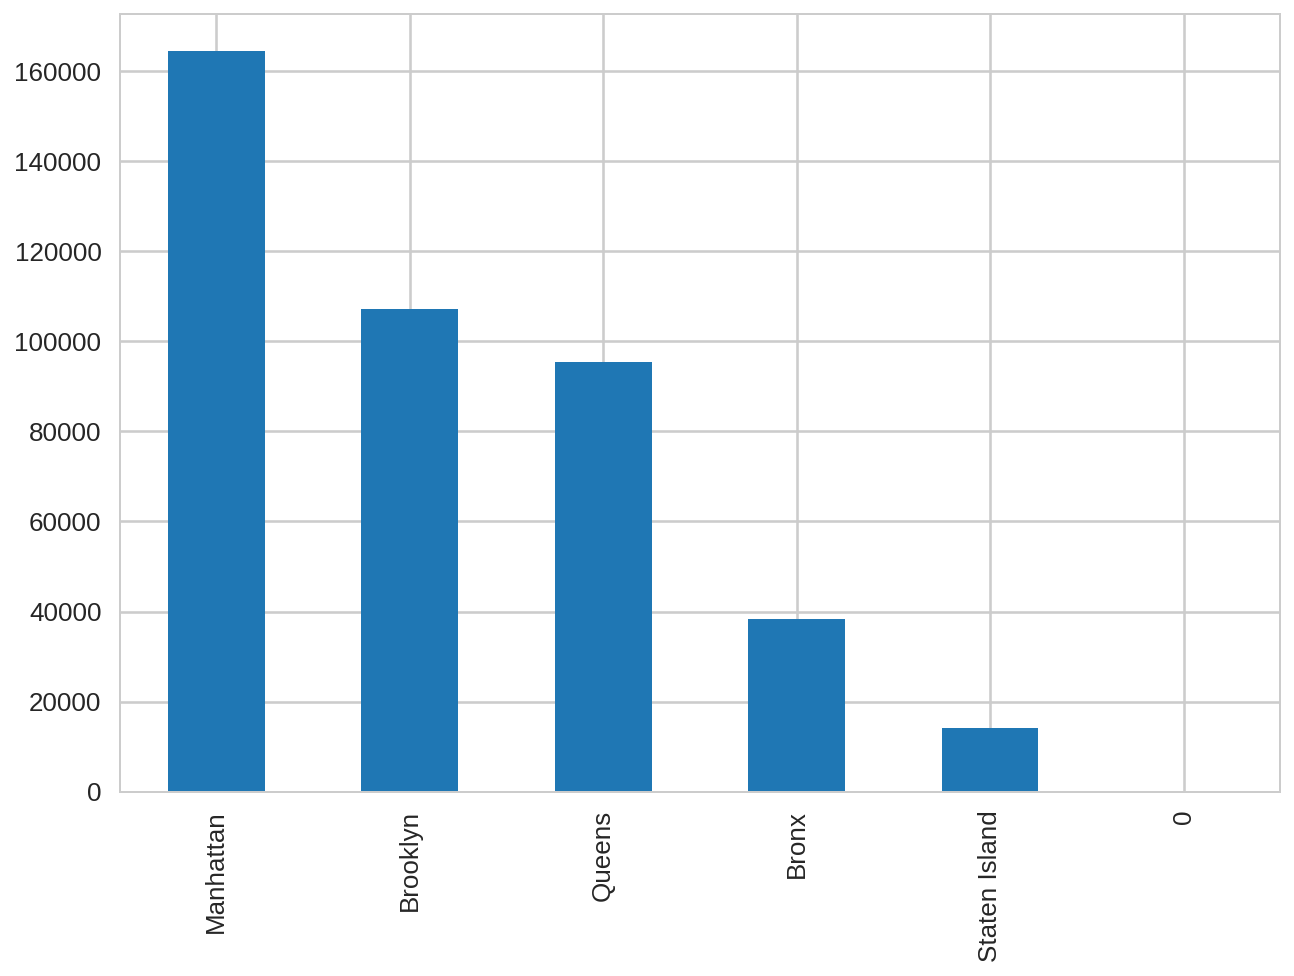

In [40]:
restaurants['BORO'].value_counts().plot(kind='bar')

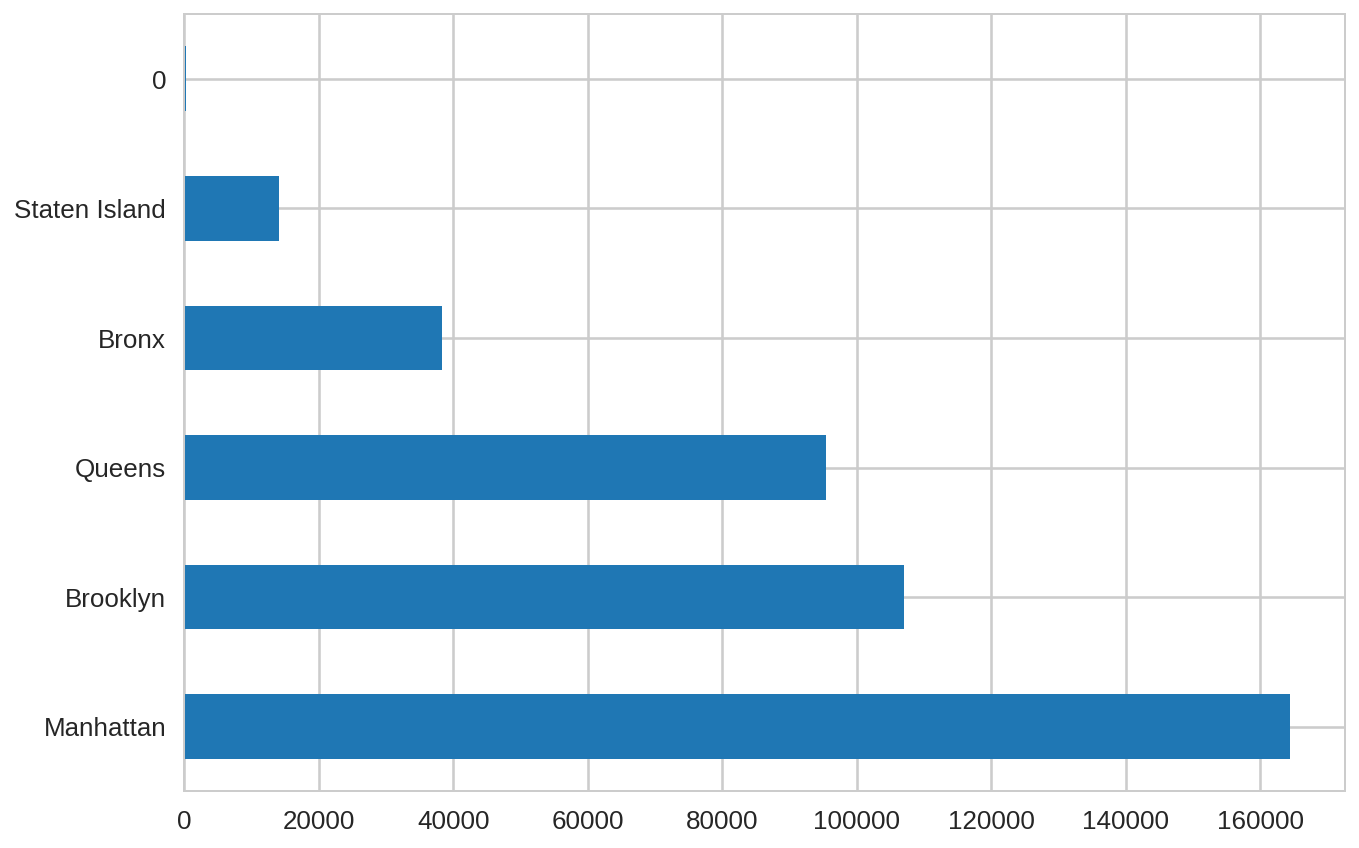

In [41]:
restaurants['BORO'].value_counts().plot(kind='barh')

## Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [42]:
restaurants

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50002767,THE SKYLARK,Manhattan,530,FASHION AVENUE,10018,2122574577,American,2017-02-15,D,10B,Plumbing not properly installed or maintained;...,G,12.0,A,2017-02-15,2021-05-21,Cycle Inspection / Initial Inspection,40.753843959794,-73.988551029682,105,03,011300,1014485,1007880049,MN17
1,50071004,SPOONS,Brooklyn,5001,13TH AVE,11219,7186335555,Jewish/Kosher,2019-02-25,F,10B,Plumbing not properly installed or maintained;...,G,19.0,B,2019-02-25,2021-05-21,Cycle Inspection / Re-inspection,40.634369857963,-73.992779791426,312,44,023600,3138066,3056490010,BK88
2,50071004,SPOONS,Brooklyn,5001,13TH AVE,11219,7186335555,Jewish/Kosher,2019-02-25,F,10B,Plumbing not properly installed or maintained;...,G,19.0,B,2019-02-25,2021-05-21,Cycle Inspection / Re-inspection,40.634369857963,-73.992779791426,312,44,023600,3138066,3056490010,BK88
3,50005269,NO. 1 CHINESE RESTAURANT,Brooklyn,661,NOSTRAND AVENUE,11216,7186048300,Chinese,2018-04-10,D,04M,Live roaches present in facility's food and/or...,C,11.0,A,2018-04-10,2021-05-21,Cycle Inspection / Initial Inspection,40.674627856562,-73.950040775304,308,36,031701,3030990,3012270001,BK61
4,41566403,AGORA TAVERNA,Queens,7009,AUSTIN STREET,11375,7187937300,Greek,2019-12-04,D,10F,Non-food contact surface improperly constructe...,G,12.0,A,2019-12-04,2021-05-21,Cycle Inspection / Re-inspection,40.720821230918,-73.846587155131,406,29,071100,4077481,4032380033,QN17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419600,50045442,HANA ASIAN BISTRO,Queens,15003,CROSSBAY BLVD,11417,7188356888,Asian/Asian Fusion,2019-10-05,D,02H,Food not cooled by an approved method whereby ...,C,12.0,A,2019-10-05,2021-05-21,Cycle Inspection / Initial Inspection,40.670040263744,-73.842645359756,410,32,008800,4543418,4115440085,QN56
419601,50099414,FLAVORS OF ITALY,Manhattan,224,WEST 35 STREET,10001,2126951115,Italian,2019-11-08,O,10F,Non-food contact surface improperly constructe...,G,2.0,NaN,2019-11-08,2021-05-21,Pre-permit (Operational) / Reopening Inspection,40.752027150859,-73.991052578709,105,03,010900,1014414,1007840060,MN17
419602,40402465,THE UNION LEAGUE CLUB,Manhattan,38,EAST 37 STREET,10016,2126853800,American,2019-07-12,D,10F,Non-food contact surface improperly constructe...,G,9.0,A,2019-07-12,2021-05-21,Cycle Inspection / Re-inspection,40.749451357976,-73.981102509172,106,04,008200,1017184,1008660042,MN20
419603,50035638,DUMPLING LEGEND,Queens,17661,UNION TPKE,11366,7183800028,Asian/Asian Fusion,2020-03-14,U,02B,Hot food item not held at or above 140º F.,C,7.0,NaN,NaT,2021-05-21,Cycle Inspection / Initial Inspection,40.725866915827,-73.79142917068,408,24,133900,4154571,4071870049,QN41


In [43]:
restaurants[ ["DBA", "GRADE", "GRADE DATE"] ]

,DBA,GRADE,GRADE DATE
0,THE SKYLARK,A,2017-02-15
1,SPOONS,B,2019-02-25
2,SPOONS,B,2019-02-25
3,NO. 1 CHINESE RESTAURANT,A,2018-04-10
4,AGORA TAVERNA,A,2019-12-04
...,...,...,...
419600,HANA ASIAN BISTRO,A,2019-10-05
419601,FLAVORS OF ITALY,NaN,2019-11-08
419602,THE UNION LEAGUE CLUB,A,2019-07-12
419603,DUMPLING LEGEND,NaN,NaT


In [44]:
columns = ["GRADE DATE","VIOLATION CODE", "DBA", "SCORE"]
restaurants[ columns ].head(10)

,GRADE DATE,VIOLATION CODE,DBA,SCORE
0,2017-02-15,10B,THE SKYLARK,12.0
1,2019-02-25,10B,SPOONS,19.0
2,2019-02-25,10B,SPOONS,19.0
3,2018-04-10,04M,NO. 1 CHINESE RESTAURANT,11.0
4,2019-12-04,10F,AGORA TAVERNA,12.0
5,NaT,05D,COZY DINER & CAFE,-1.0
6,NaT,10F,UNIDENTIFIED FLYING CHICKEN,-1.0
7,NaT,06B,MEZZE,24.0
8,2016-10-27,10D,OCEAN CHINESE RESTAURANT,13.0
9,NaT,02B,KEG AND LANTERN TAVERN,20.0


In [45]:
restaurants[ ["GRADE DATE","VIOLATION CODE", "DBA", "SCORE"] ].head(10)

,GRADE DATE,VIOLATION CODE,DBA,SCORE
0,2017-02-15,10B,THE SKYLARK,12.0
1,2019-02-25,10B,SPOONS,19.0
2,2019-02-25,10B,SPOONS,19.0
3,2018-04-10,04M,NO. 1 CHINESE RESTAURANT,11.0
4,2019-12-04,10F,AGORA TAVERNA,12.0
5,NaT,05D,COZY DINER & CAFE,-1.0
6,NaT,10F,UNIDENTIFIED FLYING CHICKEN,-1.0
7,NaT,06B,MEZZE,24.0
8,2016-10-27,10D,OCEAN CHINESE RESTAURANT,13.0
9,NaT,02B,KEG AND LANTERN TAVERN,20.0


## Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [46]:
restaurants

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50002767,THE SKYLARK,Manhattan,530,FASHION AVENUE,10018,2122574577,American,2017-02-15,D,10B,Plumbing not properly installed or maintained;...,G,12.0,A,2017-02-15,2021-05-21,Cycle Inspection / Initial Inspection,40.753843959794,-73.988551029682,105,03,011300,1014485,1007880049,MN17
1,50071004,SPOONS,Brooklyn,5001,13TH AVE,11219,7186335555,Jewish/Kosher,2019-02-25,F,10B,Plumbing not properly installed or maintained;...,G,19.0,B,2019-02-25,2021-05-21,Cycle Inspection / Re-inspection,40.634369857963,-73.992779791426,312,44,023600,3138066,3056490010,BK88
2,50071004,SPOONS,Brooklyn,5001,13TH AVE,11219,7186335555,Jewish/Kosher,2019-02-25,F,10B,Plumbing not properly installed or maintained;...,G,19.0,B,2019-02-25,2021-05-21,Cycle Inspection / Re-inspection,40.634369857963,-73.992779791426,312,44,023600,3138066,3056490010,BK88
3,50005269,NO. 1 CHINESE RESTAURANT,Brooklyn,661,NOSTRAND AVENUE,11216,7186048300,Chinese,2018-04-10,D,04M,Live roaches present in facility's food and/or...,C,11.0,A,2018-04-10,2021-05-21,Cycle Inspection / Initial Inspection,40.674627856562,-73.950040775304,308,36,031701,3030990,3012270001,BK61
4,41566403,AGORA TAVERNA,Queens,7009,AUSTIN STREET,11375,7187937300,Greek,2019-12-04,D,10F,Non-food contact surface improperly constructe...,G,12.0,A,2019-12-04,2021-05-21,Cycle Inspection / Re-inspection,40.720821230918,-73.846587155131,406,29,071100,4077481,4032380033,QN17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419600,50045442,HANA ASIAN BISTRO,Queens,15003,CROSSBAY BLVD,11417,7188356888,Asian/Asian Fusion,2019-10-05,D,02H,Food not cooled by an approved method whereby ...,C,12.0,A,2019-10-05,2021-05-21,Cycle Inspection / Initial Inspection,40.670040263744,-73.842645359756,410,32,008800,4543418,4115440085,QN56
419601,50099414,FLAVORS OF ITALY,Manhattan,224,WEST 35 STREET,10001,2126951115,Italian,2019-11-08,O,10F,Non-food contact surface improperly constructe...,G,2.0,NaN,2019-11-08,2021-05-21,Pre-permit (Operational) / Reopening Inspection,40.752027150859,-73.991052578709,105,03,010900,1014414,1007840060,MN17
419602,40402465,THE UNION LEAGUE CLUB,Manhattan,38,EAST 37 STREET,10016,2126853800,American,2019-07-12,D,10F,Non-food contact surface improperly constructe...,G,9.0,A,2019-07-12,2021-05-21,Cycle Inspection / Re-inspection,40.749451357976,-73.981102509172,106,04,008200,1017184,1008660042,MN20
419603,50035638,DUMPLING LEGEND,Queens,17661,UNION TPKE,11366,7183800028,Asian/Asian Fusion,2020-03-14,U,02B,Hot food item not held at or above 140º F.,C,7.0,NaN,NaT,2021-05-21,Cycle Inspection / Initial Inspection,40.725866915827,-73.79142917068,408,24,133900,4154571,4071870049,QN41


In [47]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice

0         False
1         False
2         False
3         False
4         False
          ...  
419600    False
419601    False
419602    False
419603    False
419604    False
Name: VIOLATION CODE, Length: 419605, dtype: bool

In [48]:
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called  has_mice
has_mice = restaurants[mice]
has_mice

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
23,41187546,STAGHORN STEAKHOUSE,Manhattan,315,WEST 36 STREET,10018,2122394390,Steakhouse,2018-04-23,D,04L,Evidence of mice or live mice present in facil...,C,12.0,A,2018-04-23,2021-05-21,Cycle Inspection / Initial Inspection,40.75377845693,-73.993228799787,104,03,011100,1013595,1007607501,MN13
33,40515124,RENEE'S KITCHENETTE,Queens,6914,ROOSEVELT AVENUE,11377,7184769002,Filipino,2019-11-23,F,04L,Evidence of mice or live mice present in facil...,C,16.0,NaN,NaT,2021-05-21,Cycle Inspection / Initial Inspection,40.746342714386,-73.896097517061,402,26,026300,4030353,4013010031,QN63
72,50086611,MODERN BREAD AND BAGEL,Manhattan,472,COLUMBUS AVENUE,10024,6467752985,American,2019-11-07,U,04L,Evidence of mice or live mice present in facil...,C,27.0,B,2019-11-07,2021-05-21,Cycle Inspection / Re-inspection,40.784291863123,-73.973783832856,107,06,016900,1032072,1012130034,MN12
73,50069955,KOTO,Brooklyn,263,FLATBUSH AVENUE,11217,7182303881,Japanese,2017-11-02,D,04L,Evidence of mice or live mice present in facil...,C,13.0,A,2017-11-02,2021-05-21,Cycle Inspection / Re-inspection,40.679936058477,-73.974445138877,308,35,016100,3028029,3011430003,BK64
96,50017056,SILVER SPOON DINER,Queens,58-21,JUNCTION BOULEVARD,11373,7183933000,American,2018-06-20,P,04L,Evidence of mice or live mice present in facil...,C,18.0,NaN,NaT,2021-05-21,Cycle Inspection / Initial Inspection,40.73521885262,-73.865097330297,404,21,045500,4047312,4019180025,QN25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419478,50089144,BERLIN DONER,Manhattan,104,MACDOUGAL STREET,10012,9179652566,Turkish,2019-11-18,G,04L,Evidence of mice or live mice present in facil...,C,64.0,NaN,NaT,2021-05-21,Cycle Inspection / Initial Inspection,40.729383200553,-74.000988607161,102,01,006500,1008689,1005400001,MN23
419483,41576311,PICCOLO CAFE,Manhattan,238,MADISON AVENUE,10016,2124474399,Italian,2019-07-02,F,04L,Evidence of mice or live mice present in facil...,C,28.0,NaN,NaT,2021-05-21,Cycle Inspection / Initial Inspection,40.749939970848,-73.981380276359,105,04,008200,1017195,1008670016,MN20
419495,50016118,PAPA JOHN'S,Queens,133-38,SPRINGFIELD BOULEVARD,11413,7184817272,Pizza,2017-05-22,F,04L,Evidence of mice or live mice present in facil...,C,30.0,NaN,NaT,2021-05-21,Cycle Inspection / Initial Inspection,40.680652334355,-73.75284890868,412,27,035200,4000000,4127230001,QN08
419595,50056559,IL SAPORE CAFE,Staten Island,10,AKRON STREET,10314,7189830883,Pizza,2019-04-24,U,04L,Evidence of mice or live mice present in facil...,C,14.0,NaN,NaT,2021-05-21,Cycle Inspection / Initial Inspection,40.611730739157,-74.158830217992,502,50,029104,5104032,5015460005,SI05


In [49]:
restaurants["DBA"].value_counts()[:20]

DUNKIN                                   4828
SUBWAY                                   3134
STARBUCKS                                2421
MCDONALD'S                               2312
KENNEDY FRIED CHICKEN                    1415
CROWN FRIED CHICKEN                      1229
BURGER KING                              1168
POPEYES                                  1041
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     996
DUNKIN',' BASKIN ROBBINS                  882
CHIPOTLE MEXICAN GRILL                    734
KFC                                       695
DOMINO'S                                  670
CHECKERS                                  506
WENDY'S                                   499
CARVEL                                    440
VIVI BUBBLE TEA                           414
PRET A MANGER                             394
PAPA JOHN'S                               380
SWEETGREEN                                379
Name: DBA, dtype: int64

In [50]:
# List the most frequent DBA values in the dataframe
has_mice["DBA"].value_counts()[:20]

SUBWAY                                   254
DUNKIN                                   155
KENNEDY FRIED CHICKEN                    127
CROWN FRIED CHICKEN                      120
STARBUCKS                                 86
MCDONALD'S                                81
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     80
POPEYES                                   75
BURGER KING                               65
DUNKIN',' BASKIN ROBBINS                  48
KFC                                       40
DOMINO'S                                  38
CARVEL                                    37
LITTLE CAESARS                            34
AMC THEATRES                              31
PAPA JOHN'S                               27
VIVI BUBBLE TEA                           22
INSOMNIA COOKIES                          21
EMPANADAS MONUMENTAL                      21
BAREBURGER                                20
Name: DBA, dtype: int64

In [51]:
has_mice["CAMIS"].value_counts()[:10]

50015263    13
50016943    13
50058969    12
50046623    12
41642251    12
50040389    11
50015341    11
40597409    11
40423819    11
50004065    11
Name: CAMIS, dtype: int64

In [52]:
condition = (has_mice["CAMIS"] == '50036890')
has_mice[condition]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
77798,50036890,NEW SHANGHAI TAN RESTAURANT,Queens,13520,40TH RD,11354,7186610900,Chinese,2018-01-24,O,04L,Evidence of mice or live mice present in facil...,C,9.0,C,2018-01-24,2021-05-21,Cycle Inspection / Reopening Inspection,40.75884874404,-73.830118577915,407,20,087100,4449969,4050370053,QN22
169364,50036890,NEW SHANGHAI TAN RESTAURANT,Queens,13520,40TH RD,11354,7186610900,Chinese,2018-01-18,G,04L,Evidence of mice or live mice present in facil...,C,51.0,NaN,NaT,2021-05-21,Cycle Inspection / Re-inspection,40.75884874404,-73.830118577915,407,20,087100,4449969,4050370053,QN22
206014,50036890,NEW SHANGHAI TAN RESTAURANT,Queens,13520,40TH RD,11354,7186610900,Chinese,2018-11-10,G,04L,Evidence of mice or live mice present in facil...,C,80.0,NaN,NaT,2021-05-21,Cycle Inspection / Re-inspection,40.75884874404,-73.830118577915,407,20,087100,4449969,4050370053,QN22
238351,50036890,NEW SHANGHAI TAN RESTAURANT,Queens,13520,40TH RD,11354,7186610900,Chinese,2018-05-22,F,04L,Evidence of mice or live mice present in facil...,C,31.0,NaN,NaT,2021-05-21,Cycle Inspection / Initial Inspection,40.75884874404,-73.830118577915,407,20,087100,4449969,4050370053,QN22
265244,50036890,NEW SHANGHAI TAN RESTAURANT,Queens,13520,40TH RD,11354,7186610900,Chinese,2017-12-13,F,04L,Evidence of mice or live mice present in facil...,C,36.0,NaN,NaT,2021-05-21,Cycle Inspection / Initial Inspection,40.75884874404,-73.830118577915,407,20,087100,4449969,4050370053,QN22
271053,50036890,NEW SHANGHAI TAN RESTAURANT,Queens,13520,40TH RD,11354,7186610900,Chinese,2018-01-23,8,04L,Evidence of mice or live mice present in facil...,C,19.0,NaN,NaT,2021-05-21,Cycle Inspection / Reopening Inspection,40.75884874404,-73.830118577915,407,20,087100,4449969,4050370053,QN22
346066,50036890,NEW SHANGHAI TAN RESTAURANT,Queens,13520,40TH RD,11354,7186610900,Chinese,2018-07-19,F,04L,Evidence of mice or live mice present in facil...,C,25.0,B,2018-07-19,2021-05-21,Cycle Inspection / Re-inspection,40.75884874404,-73.830118577915,407,20,087100,4449969,4050370053,QN22
373057,50036890,NEW SHANGHAI TAN RESTAURANT,Queens,13520,40TH RD,11354,7186610900,Chinese,2019-04-02,F,04L,Evidence of mice or live mice present in facil...,C,17.0,NaN,NaT,2021-05-21,Cycle Inspection / Initial Inspection,40.75884874404,-73.830118577915,407,20,087100,4449969,4050370053,QN22


And we can use more complex conditions. 

In [53]:
# AND in pandas is "&"
# OR in pandas is "|"


In [54]:
mice_10012 =  (restaurants["VIOLATION CODE"] == "04L") & (restaurants["ZIPCODE"] == "10012")

In [55]:
has_mice_10012 = restaurants[mice_10012]
has_mice_10012

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
587,50001719,RINTINTIN,Manhattan,14,SPRING STREET,10012,6466660114,Mediterranean,2019-08-20,D,04L,Evidence of mice or live mice present in facil...,C,13.0,A,2019-08-20,2021-05-21,Cycle Inspection / Re-inspection,40.721340922363,-73.994823067786,102,01,004100,1077741,1004790021,MN24
1212,50058924,BANTER,Manhattan,169,SULLIVAN STREET,10012,3475151449,Australian,2018-03-15,F,04L,Evidence of mice or live mice present in facil...,C,50.0,NaN,NaT,2021-05-21,Cycle Inspection / Initial Inspection,40.727972389856,-74.001111257425,102,03,006500,1008258,1005250032,MN23
1911,50095222,GOLDING CAFE,Manhattan,40,WASHINGTON SQUARE SOUTH,10012,2129986498,American,2019-09-25,P,04L,Evidence of mice or live mice present in facil...,C,16.0,NaN,NaT,2021-05-21,Pre-permit (Operational) / Initial Inspection,40.730972422856,-73.99949486016,102,01,006500,1008716,1005410001,MN23
2444,50004221,INSOMNIA COOKIES,Manhattan,116,MACDOUGAL STREET,10012,8776326654,Bakery Products/Desserts,2018-09-14,D,04L,Evidence of mice or live mice present in facil...,C,12.0,A,2018-09-14,2021-05-21,Cycle Inspection / Initial Inspection,40.729696105789,-74.00072522254,102,01,006500,1008694,1005400007,MN23
2547,50079043,"DOMODOMO KITCHEN, RAW BAR",Manhattan,138-140,W HOUSTON ST,10012,6467070301,Seafood,2018-06-05,F,04L,Evidence of mice or live mice present in facil...,C,33.0,NaN,NaT,2021-05-21,Pre-permit (Operational) / Initial Inspection,40.727821420367,-74.001710177992,102,03,006500,1008338,1005260079,MN23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415140,41429072,PICCOLA CUCINA,Manhattan,184,PRINCE STREET,10012,2126253200,Italian,2018-08-27,F,04L,Evidence of mice or live mice present in facil...,C,28.0,NaN,NaT,2021-05-21,Cycle Inspection / Initial Inspection,40.726372176688,-74.002139479768,102,03,004900,1007783,1005030018,MN24
416140,41660639,"CAFETAL SOCIAL CLUB, CHACHIS",Manhattan,285,MOTT STREET,10012,2129661259,Italian,2018-03-29,F,04L,Evidence of mice or live mice present in facil...,C,23.0,NaN,NaT,2021-05-21,Cycle Inspection / Initial Inspection,40.72415703468,-73.99442599334,102,01,004300,1007923,1005090027,MN24
417521,41679646,GREENWICH VILLAGE COMEDY CLUB,Manhattan,99,MACDOUGAL STREET,10012,2127775233,American,2020-03-03,D,04L,Evidence of mice or live mice present in facil...,C,12.0,A,2020-03-03,2021-05-21,Cycle Inspection / Initial Inspection,40.72949573651,-74.00092005567,102,01,006500,1008733,1005420051,MN23
419427,50060161,GROOVE,Manhattan,125,MACDOUGAL STREET,10012,2122549393,American,2019-06-12,G,04L,Evidence of mice or live mice present in facil...,C,40.0,NaN,NaT,2021-05-21,Cycle Inspection / Initial Inspection,40.730519537688,-74.000054121756,102,01,006500,1008764,1005430060,MN23


In [56]:
has_mice_10012["DBA"].value_counts()[:20]

LITTLE CUPCAKE BAKE SHOP        11
CAFETAL SOCIAL CLUB, CHACHIS     9
SPRINGBONE KITCHEN               7
EGG SHOP                         7
DANTE                            7
GROOVE                           6
PEPE ROSSO TO GO                 6
THINK COFFEE                     6
INSOMNIA COOKIES                 6
PICCOLA CUCINA                   6
MONTE'S                          6
RAMEN-YA                         5
BAO TEA HOUSE                    5
EPISTROPHY CAFE                  5
TRIONA'S                         5
BEN'S PIZZA                      5
VIN ET FLEURS                    5
CHOBANI SOHO                     5
BANTER                           5
THE RED LION                     5
Name: DBA, dtype: int64

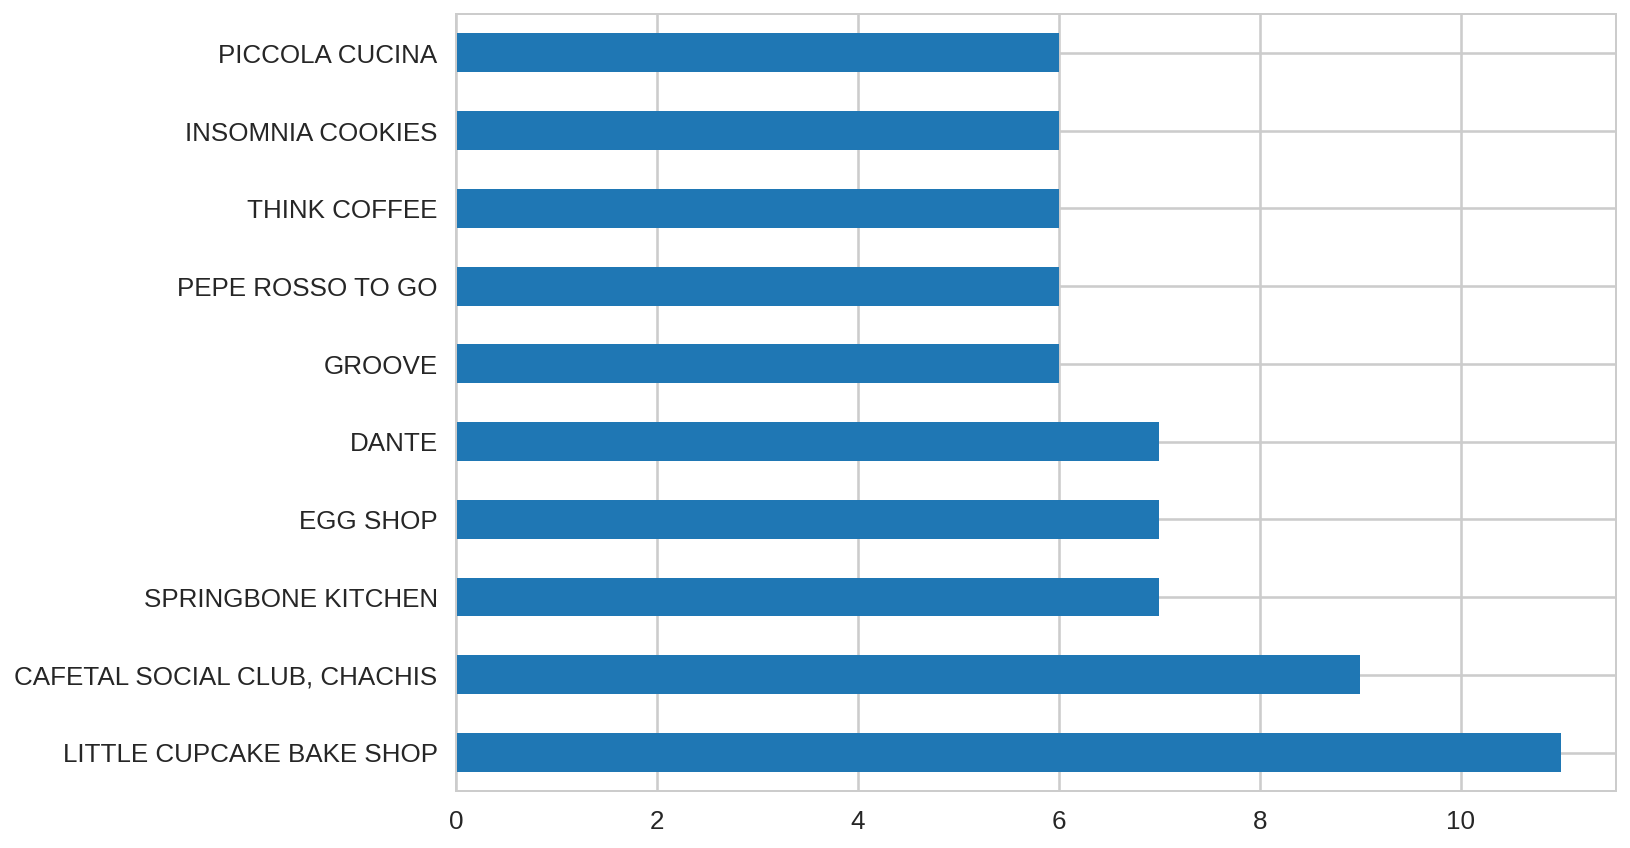

In [57]:
has_mice_10012["DBA"].value_counts()[:10].plot(kind='barh')

## Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) is one of the most commonly used exploratory tools, and in Pandas they are extremely flexible. 

For example, let's try to count the number of restaurants that are inspected every day. 

In [90]:
# Count the number of CAMIS values that appear on each date

pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'CAMIS',  # specifies the content of the cells
    aggfunc = 'count' # we ask to count how many different CAMIS values we see
)

In [91]:
pivot

,CAMIS
INSPECTION DATE,
1900-01-01,4340
2011-04-19,7
2011-05-27,3
2011-10-13,7
2011-10-25,2
...,...
2021-05-06,1
2021-05-11,2
2021-05-12,1


Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

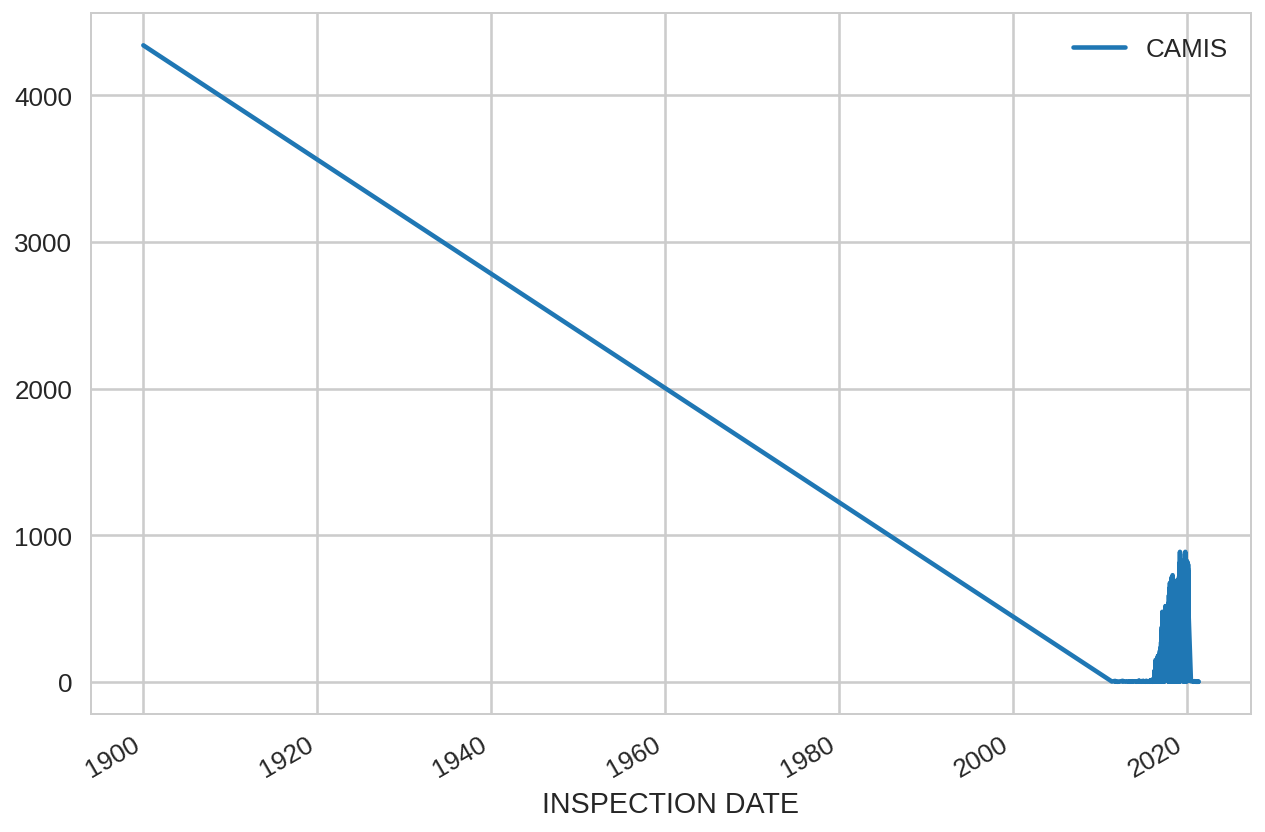

In [92]:
pivot.plot()

In [93]:
pivot.head(5)

,CAMIS
INSPECTION DATE,
1900-01-01,4340
2011-04-19,7
2011-05-27,3
2011-10-13,7
2011-10-25,2


#### Deleting rows from a DataFrame

Hm, that '1900-01-01' line is messing things up. Let's delete it, using the `drop` command. Notice a few things:
* We use the `pd.to_datetime` command to convert the '1900-01-01' string into a datetime data type.
* We use the `axis='index'` parameter means that we delete a **row** with that index value. (The `axis='columns'` means that we delete a column.). Often you will see `axis=0` (equivalent to `axis='index'`) and `axis=1` (equivalent to `axis='columns'`).
* The `inplace=True` means that we change directly the dataframe, instead of returning a new dataframe that does not have the deleted value.

In [94]:
pivot.drop(pd.to_datetime('1900-01-01'), axis='index', inplace=True) 

In [95]:
pivot.head(5)

,CAMIS
INSPECTION DATE,
2011-04-19,7
2011-05-27,3
2011-10-13,7
2011-10-25,2
2012-02-14,1


In [96]:
pivot.tail()

,CAMIS
INSPECTION DATE,
2021-05-06,1
2021-05-11,2
2021-05-12,1
2021-05-13,1
2021-05-14,1


And let's plot again.

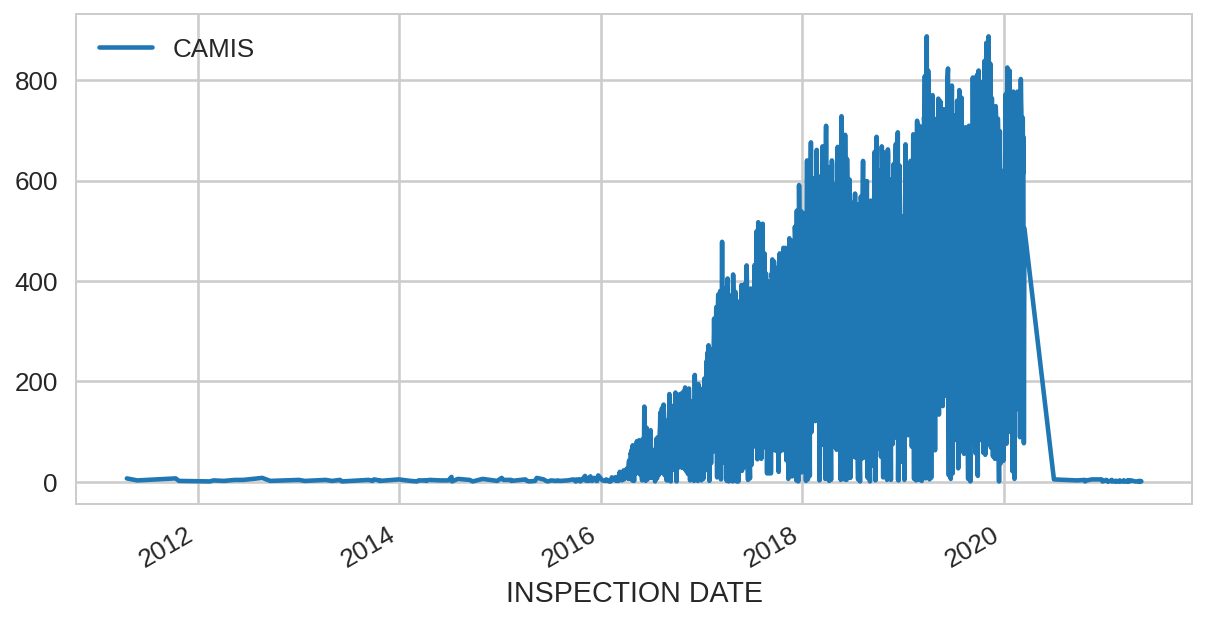

In [97]:
pivot.plot(figsize=(10,5))

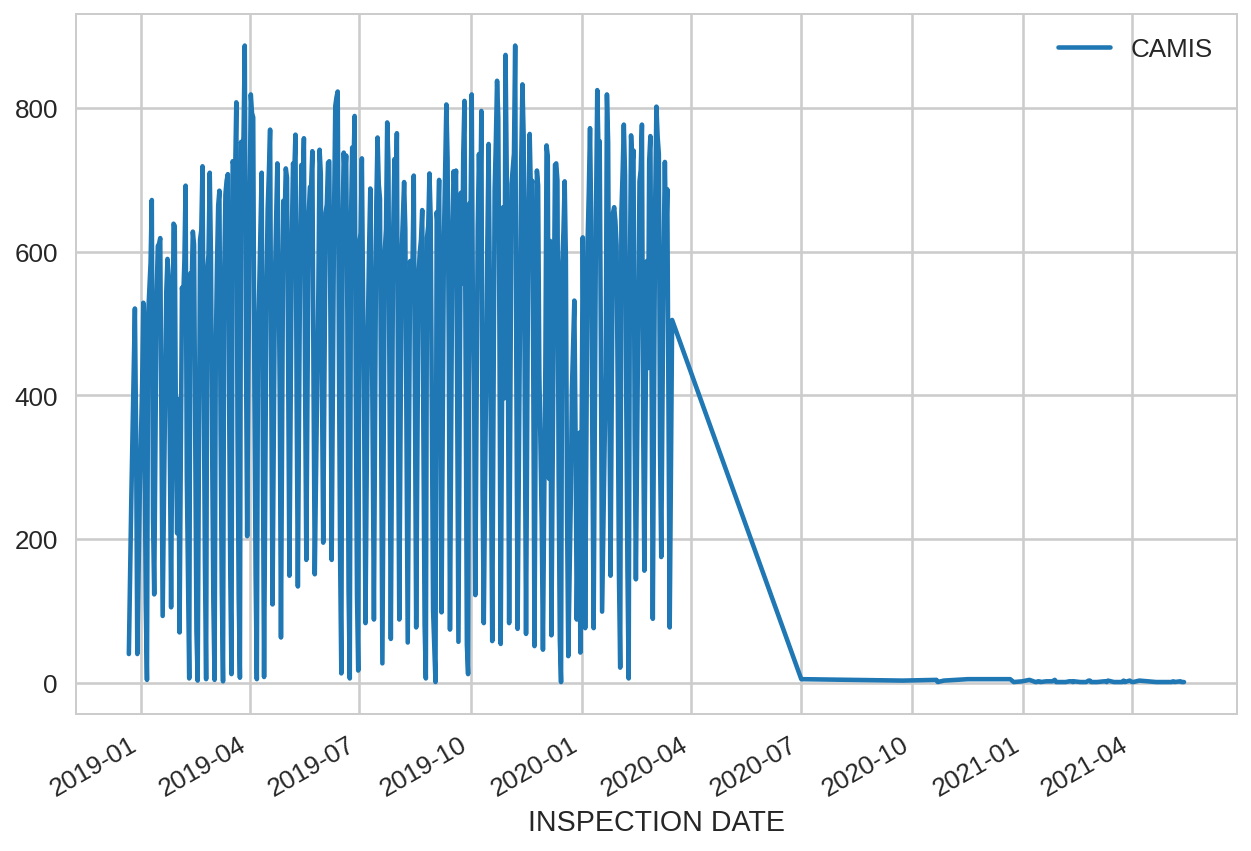

In [99]:
pivot.tail(450).plot()

#### Changing date granularity 

We can also use the [resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) command to change the frequency from one day, to, say, 7 days. Then we can compute, say, the average (`mean()`) for these days, or the total number (`sum()`) of inspections.

In [102]:
pivot.resample('1W').sum().tail(100)

,CAMIS
INSPECTION DATE,
2019-06-23,3459
2019-06-30,3431
2019-07-07,2401
2019-07-14,2770
2019-07-21,3166
...,...
2021-04-18,0
2021-04-25,3
2021-05-02,1


Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

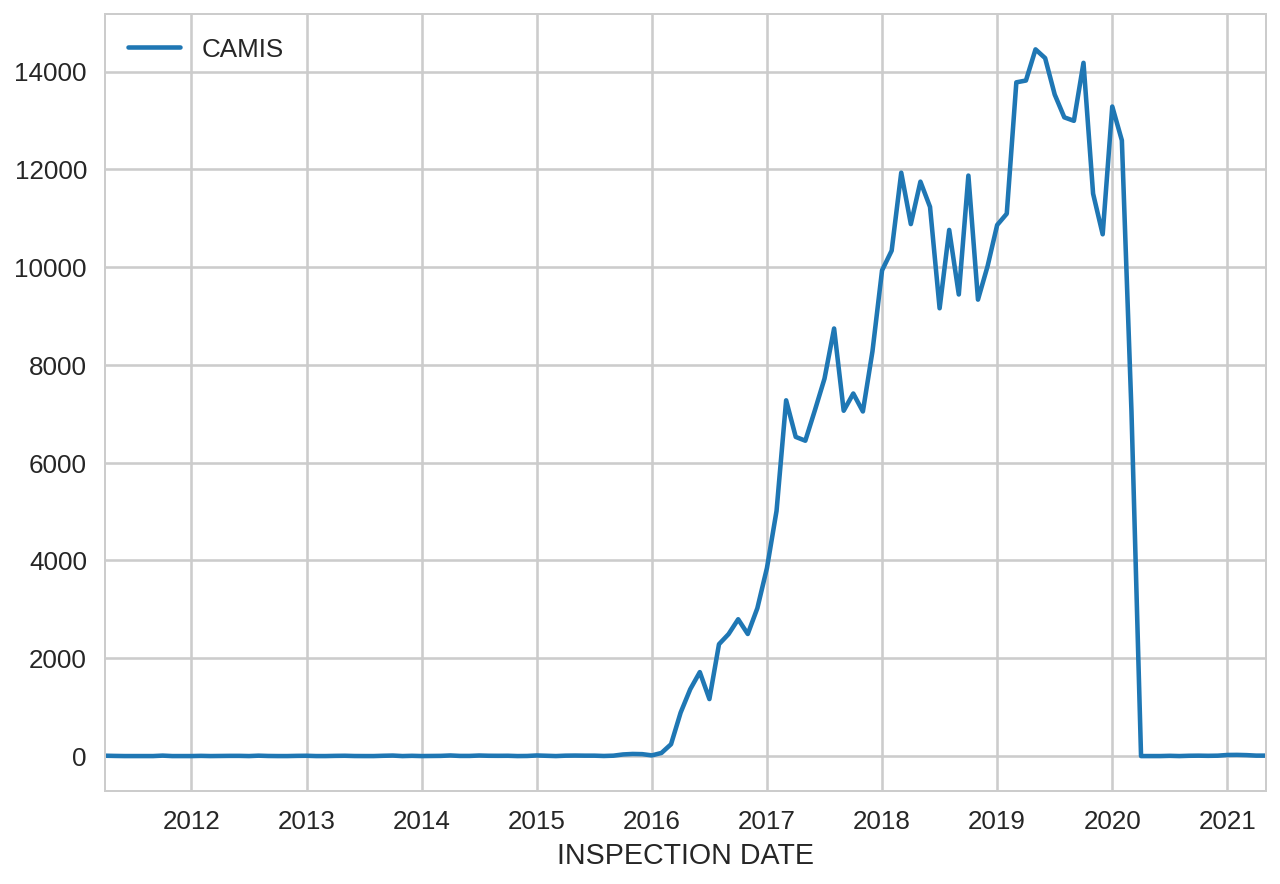

In [103]:
# Plot the average number of inspections, over 7-day periods
pivot.resample('1M').sum().plot()

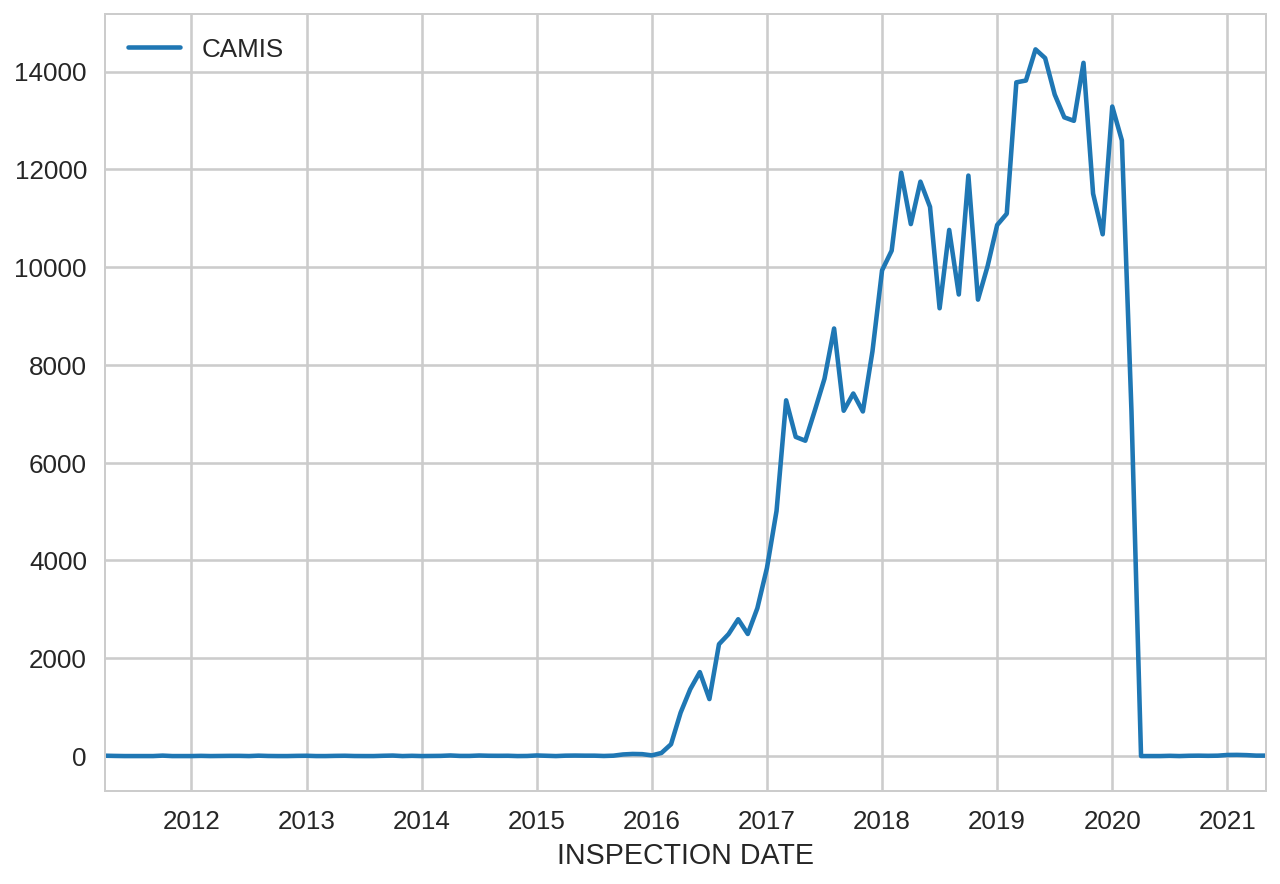

In [104]:
# Plot the total number of inspections, over 1-month periods
pivot.resample('1M').sum().plot()

Text(0.5, 1.0, 'Analysis of Number of Inspections over Time')

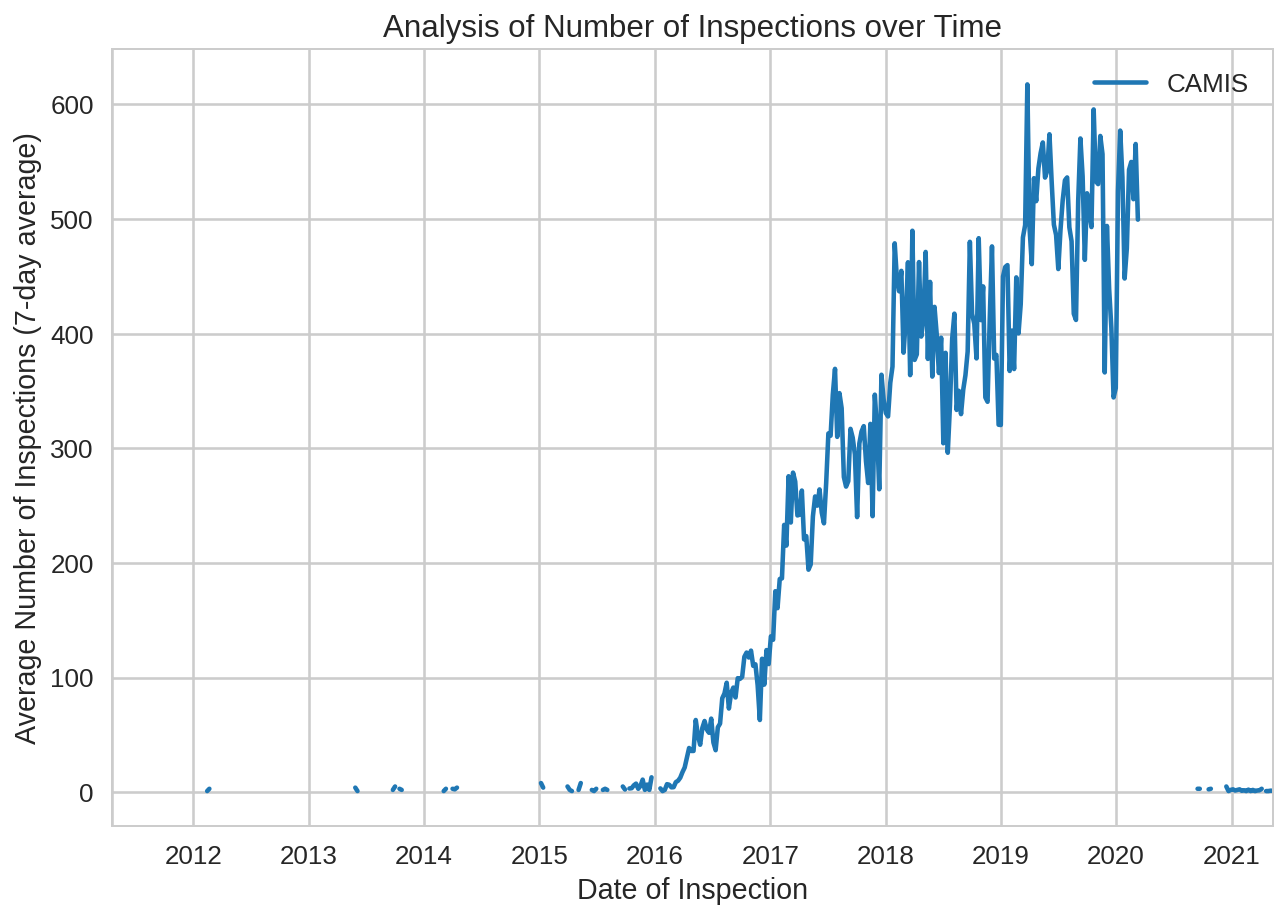

In [105]:
plot = pivot.resample('7D').mean().plot()
plot.set_xlabel("Date of Inspection")
plot.set_ylabel("Average Number of Inspections (7-day average)")
plot.set_title("Analysis of Number of Inspections over Time")

#### Pivot Table with two (or more) variables)

We would like to break down the results by borough, so we add the `column` parameter.

In [106]:
pivot2 = pd.pivot_table(
    data = restaurants, #
    index = 'INSPECTION DATE', 
    columns = 'BORO', 
    values = 'CAMIS', 
    aggfunc = 'count'
)
pivot2.head(10)

BORO,0,Bronx,Brooklyn,Manhattan,Queens,Staten Island
INSPECTION DATE,,,,,,
1900-01-01,22.0,381.0,1245.0,1516.0,1022.0,154.0
2011-04-19,NaN,7.0,NaN,NaN,NaN,NaN
2011-05-27,NaN,3.0,NaN,NaN,NaN,NaN
2011-10-13,NaN,7.0,NaN,NaN,NaN,NaN
2011-10-25,NaN,2.0,NaN,NaN,NaN,NaN
2012-02-14,NaN,NaN,1.0,NaN,NaN,NaN
2012-02-27,NaN,3.0,NaN,NaN,NaN,NaN
2012-04-05,NaN,2.0,NaN,NaN,NaN,NaN
2012-05-14,NaN,NaN,4.0,NaN,NaN,NaN


##### Deleting rows and columns

Now, you will notice that there are a few columns and rows that are just noise. The first row with date *'1900-01-01'* is clearly noise, and the *'0'* column is also noise. We can use the `drop` command of Pandas to drop these.

In [107]:
# The axis='index' (or axis=0) means that we delete a row with that index value
pivot2 = pivot2.drop(pd.to_datetime('1900-01-01'), axis='index') 

In [108]:
# The axis='columns' (or axis=1) means that we delete a columns with that value
pivot2 = pivot2.drop('0', axis='columns')

In [109]:
pivot2.tail(5)

BORO,Bronx,Brooklyn,Manhattan,Queens,Staten Island
INSPECTION DATE,,,,,
2021-05-06,1.0,NaN,NaN,NaN,NaN
2021-05-11,NaN,NaN,1.0,1.0,NaN
2021-05-12,NaN,1.0,NaN,NaN,NaN
2021-05-13,NaN,NaN,1.0,NaN,NaN
2021-05-14,1.0,NaN,NaN,NaN,NaN


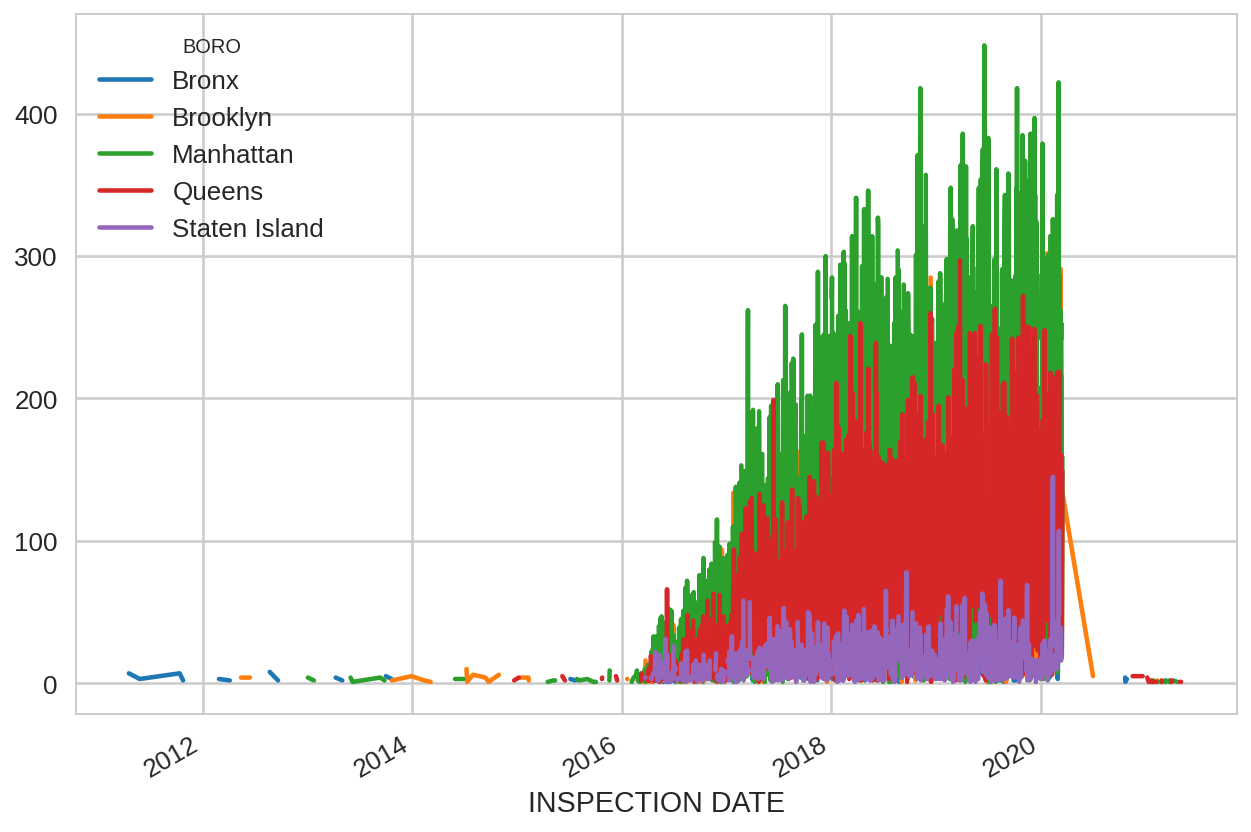

In [110]:
pivot2.plot()

In [111]:
# We resample the index, to keep only dates every one month
# For that one month period, we compute the average value
pivot2.resample('1M').mean().tail(10)

BORO,Bronx,Brooklyn,Manhattan,Queens,Staten Island
INSPECTION DATE,,,,,
2020-08-31,NaN,NaN,NaN,NaN,NaN
2020-09-30,3.000000,NaN,NaN,3.000000,NaN
2020-10-31,2.666667,NaN,NaN,NaN,NaN
2020-11-30,NaN,NaN,NaN,5.000000,NaN
2020-12-31,2.000000,1.000000,NaN,5.000000,NaN
2021-01-31,1.000000,1.000000,1.166667,1.500000,NaN
2021-02-28,1.000000,1.111111,1.000000,1.166667,NaN
2021-03-31,1.500000,1.000000,1.285714,1.250000,NaN
2021-04-30,NaN,1.000000,1.500000,1.000000,NaN


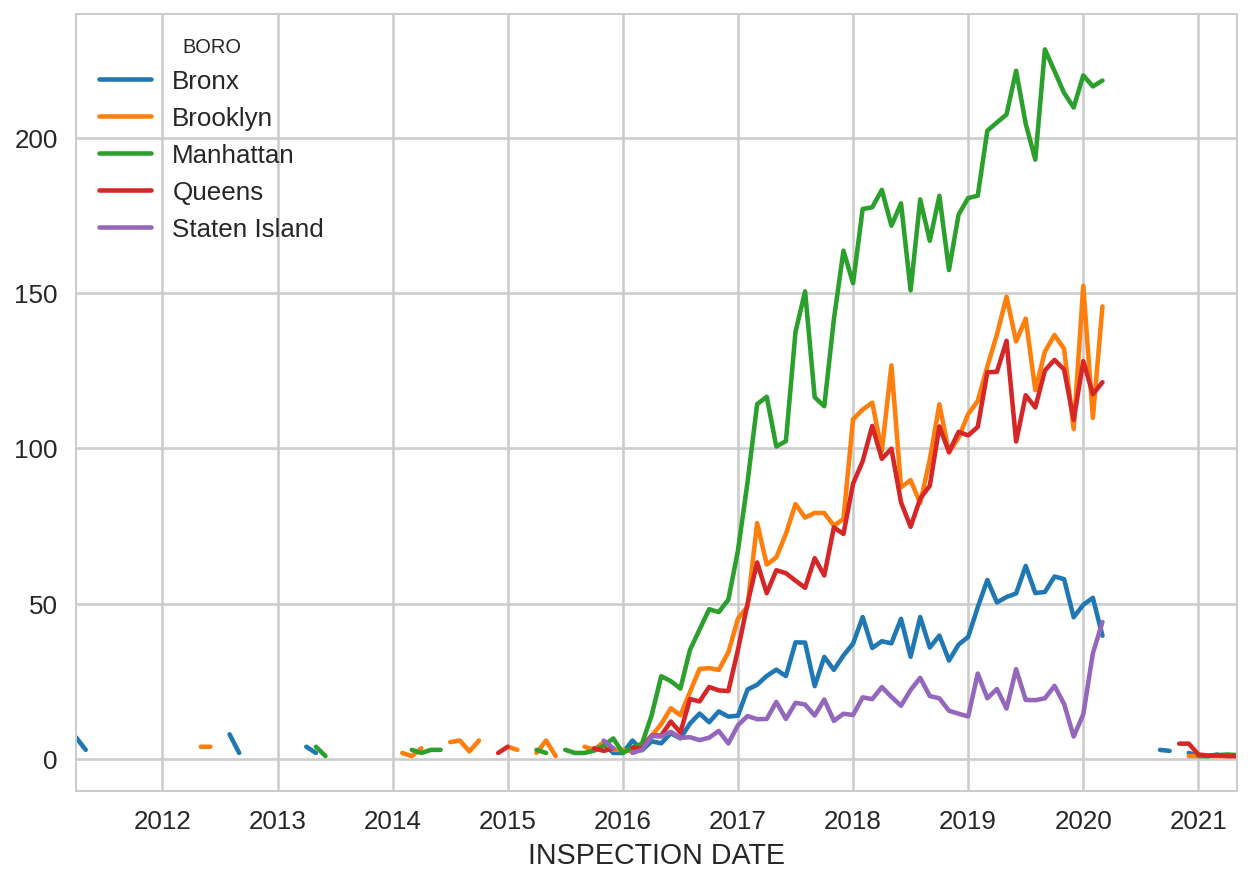

In [77]:
# If we plot a dataframe then by default the index column
# in our case the INSPECTION DATE becomes the x-asis
# and all the columns become separate lines in the plot
pivot2.resample('1M').mean().plot()

# Potential Exercise, if we have time: 
# Drop the last date, which corresponds to an incomplete month

## (Optional, FYI) Advanced Pivot Tables

We can also add multiple attributes in the index and columns. It is also possible to have multiple aggregation functions, and we can even define our own aggregation functions.

In [112]:
# We write a function that returns the 
# number of unique items in a list x 
def count_unique(x):
    return len(set(x))

# We break down by BORO and GRADE, and also calculate 
# inspections in unique (unique restaurants) 
# and non-unique entries (effectuvely, violations)
pivot_advanced = pd.pivot_table(
    data = restaurants, #
    index = 'GRADE DATE', 
    columns = ['BORO', 'GRADE'],
    values = 'CAMIS', 
    aggfunc = ['count', count_unique]
)

# Take the total number of inspections (unique and non-unique)
agg = pivot_advanced.resample('1M').sum()

# Show the last 5 entries and show the transpose (.T) 
agg.tail().T

GRADE DATE                        2020-08-31  ...  2020-12-31
             BORO          GRADE              ...            
count        0             A             0.0  ...         0.0
                           B             0.0  ...         0.0
                           C             0.0  ...         0.0
             Bronx         A             0.0  ...         2.0
                           B             0.0  ...         0.0
                           C             0.0  ...         0.0
             Brooklyn      A             0.0  ...         0.0
                           B             0.0  ...         0.0
                           C             0.0  ...         0.0
             Manhattan     A             0.0  ...         0.0
                           B             0.0  ...         0.0
                           C             0.0  ...         0.0
             Queens        A             0.0  ...         1.0
                           B             0.0  ...         0.0
                           C             0.0  ...         0.0
             Staten Island A             0.0  ...         0.0
                           B             0.0  ...         0.0
                           C             0.0  ...         0.0
count_unique 0             A             0.0  ...         0.0
                           B             0.0  ...         0.0
                           C             0.0  ...         0.0
             Bronx         A             0.0  ...         1.0
                           B             0.0  ...         0.0
                           C             0.0  ...         0.0
             Brooklyn      A             0.0  ...         0.0
                           B             0.0  ...         0.0
                           C             0.0  ...         0.0
             Manhattan     A             0.0  ...         0.0
                           B             0.0  ...         0.0
                           C             0.0  ...         0.0
             Queens        A             0.0  ...         1.0
                           B             0.0  ...         0.0
                           C             0.0  ...         0.0
             Staten Island A             0.0  ...         0.0
                           B             0.0  ...         0.0
                           C             0.0  ...         0.0

[36 rows x 5 columns]

### Exercise 1 

Now let's do the same exercise, but instead of counting the number of inspections, we want to compute the average score assigned by the inspectors. Hint: We will need to change the `values` and the `aggfunc` parameters in the `pivot_table` function above.

In [79]:
# your code here

#### Solution

In [113]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'SCORE',  # specifies the content of the cells
    aggfunc = 'mean' # compute the average SCORE
)

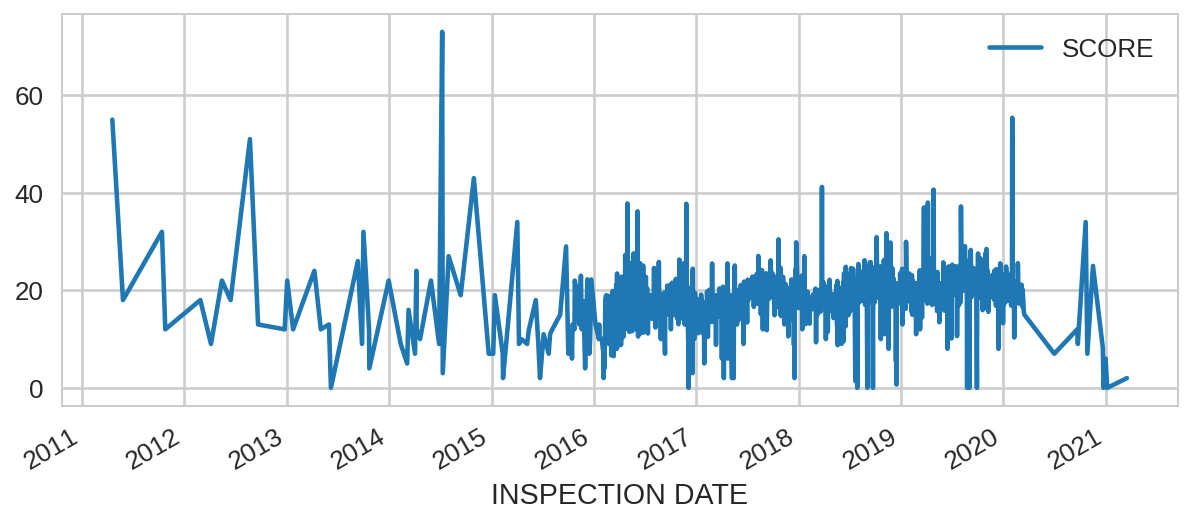

In [114]:
pivot.plot(figsize=(10,4))

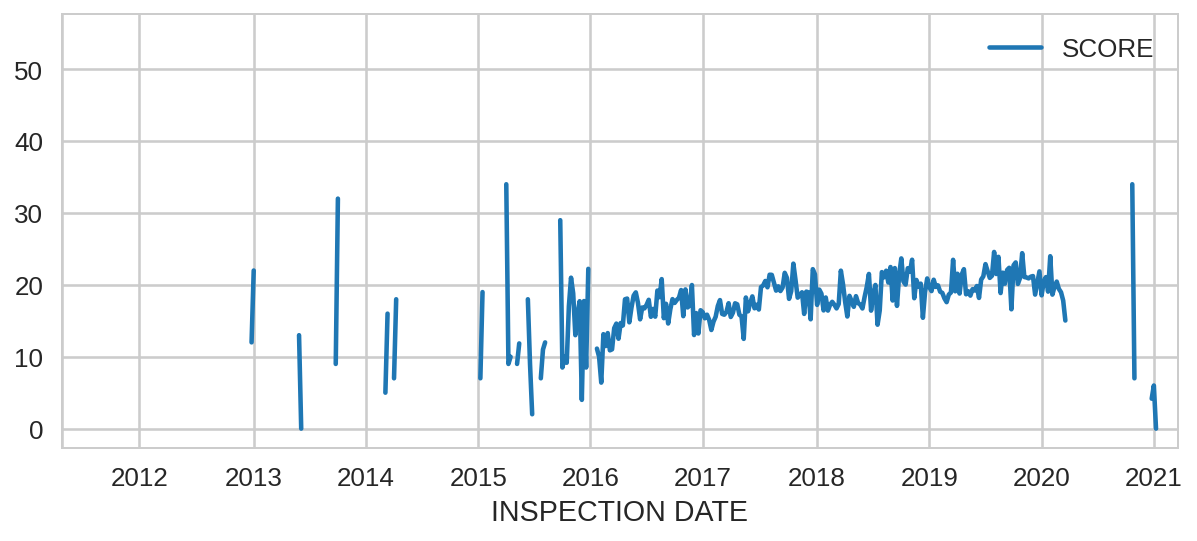

In [115]:
pivot.resample('1W').mean().plot(figsize=(10,4))



### Exercise 2

We now want to examine if different cuisines have different inspection scores. Compute the average inspection score by cuisine. Use the `sort_values()` command ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)) to order cuisines by their inspection scores.

In [83]:
# your code here

#### Solution

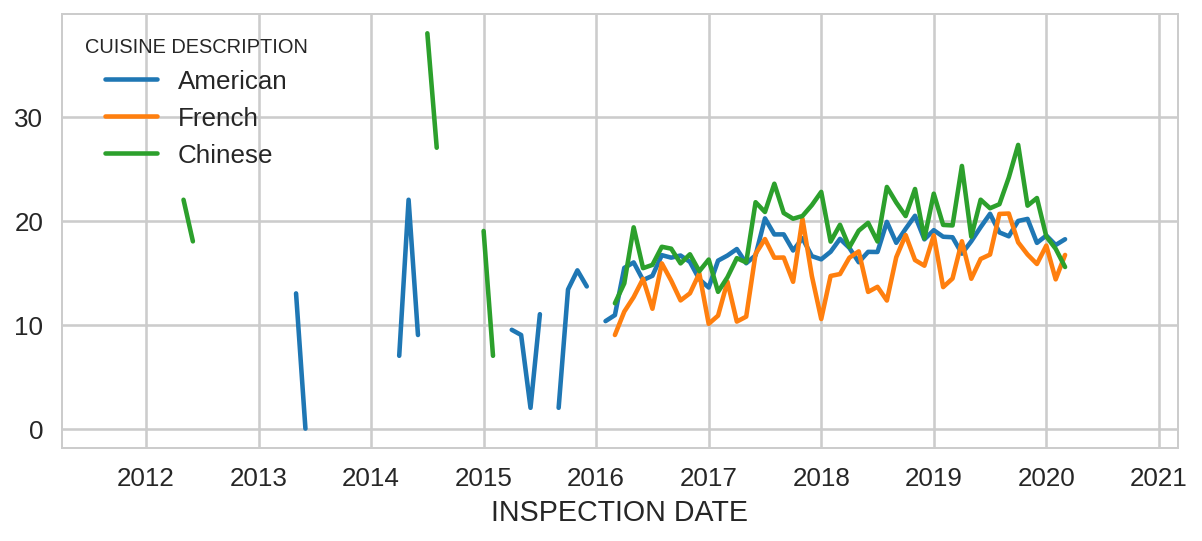

In [116]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # dates are the rows
    columns = 'CUISINE DESCRIPTION', # cuisines are the columns
    values = 'SCORE',  # we analyze the SCORE
    aggfunc = 'mean' # compute the average SCORE
)
# Select 3 columns (american, frenchn, chinese), compute the average score for a month
# and plot the results
pivot[ ["American", "French", "Chinese"] ].resample('1M').mean().plot(figsize=(10,4))